# **Description**

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:


User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount


**What good looks like?**

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

Do some data exploration steps like:
* Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
* Inference after computing the average female and male expenses.
* Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
* The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

Perform the same activity for Married vs Unmarried and Age
* For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

Give recommendations and action items to Walmart.

**Evaluation Criteria**


Defining Problem Statement and Analyzing basic metrics

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
* Non-Graphical Analysis: Value counts and unique attributes ​
* Visual Analysis - Univariate & Bivariate
 * For continuous variable(s): Distplot, countplot, histogram for univariate analysis
 * For categorical variable(s): Boxplot
 * For correlation: Heatmaps, Pairplots

Missing Value & Outlier Detection

Business Insights based on Non- Graphical and Visual Analysis
* Comments on the range of attributes
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plot

Answering questions
* Are women spending more money per transaction than men? Why or Why not?
* Confidence intervals and distribution of the mean of the expenses by female and male customers
* Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
* Results when the same activity is performed for Married vs Unmarried
* Results when the same activity is performed for Age

Final Insights - Illustrate the insights based on exploration and CLT
* Comments on the distribution of the variables and relationship between them
* Comments for each univariate and bivariate plots
* Comments on different variables when generalizing it for Population

Recommendations
* Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# **Import Libraries and Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data.csv

--2024-12-27 17:10:50--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.135, 18.64.229.71, 18.64.229.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  76.6MB/s    in 0.3s    

2024-12-27 17:10:51 (76.6 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [ ]:
data = pd.read_csv('walmart_data.csv')
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

# **Data Cleaning**

In [ ]:
data.ndim

2

Its a 2-Dimensional Data.

In [ ]:
data.shape

(550068, 10)

There are 5,50,068 rows with 10 columns in the data.

In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
data.sample(10)

User_ID Product_ID Gender    Age  Occupation City_Category  \
321425  1001500  P00267542      M  26-35          17             A   
154126  1005821  P00111842      M  26-35          15             A   
302560  1004543  P00255942      M  26-35           2             A   
282107  1001451  P00177342      M  36-45          20             B   
122251  1000894  P00030842      M  18-25           4             C   
77729   1005978  P00233542      M  36-45           1             B   
237994  1000738  P00160342      M  18-25          17             C   
11831   1001775  P00331842      M  26-35           4             C   
236550  1000498  P00348942      M  36-45          17             A   
509426  1000481  P00267142      M  46-50           7             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
321425                          2               0                 1     11656  
154126                          3               0                 8      8136  
302560                          0               0                 1     11609  
282107                          0               0                 8      9760  
122251                          0               0                 1     19508  
77729                           2               0                 1      4263  
237994                          1               0                 8      9745  
11831                           3               1                16     16588  
236550                          1               0                 8      7967  
509426                          2               0                 8      6101

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

Converting all objects to Category for better performance.

In [ ]:
data[data.select_dtypes(include='object').columns]=data.select_dtypes(include='object').apply(lambda x: x.astype('category'))

Changing the Stay_In_Current_City_Years value 4+ to 4 and data type to int for proper analysis.

In [ ]:
data.replace({'Stay_In_Current_City_Years':{'4+':'4'},'Marital_Status':{0:'Married',1:'Unmarried'}},inplace=True)
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                               2        Married                 3      8370  
1                               2        Married                 1     15200  
2                               2        Married                12      1422  
3                               2        Married                12      1057  
4                               4        Married                 8      7969  
...                           ...            ...               ...       ...  
550063                          1      Unmarried                20       368  
550064                          3        Married                20       371  
550065                          4      Unmarried                20       137  
550066                          2        Married                20       365  
550067                          4      Unmarried                20       490  

[550068 rows x 10 columns]

In [ ]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype('category')

In [ ]:
data['Marital_Status']=data['Marital_Status'].astype('category')

In [ ]:
data['Occupation']=data['Occupation'].astype('category')
data['Product_Category']=data['Product_Category'].astype('category')
data['User_ID'] = data['User_ID'].astype('category')

In [ ]:
data.dtypes

User_ID                       category
Product_ID                    category
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years       int64
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

It seems there are no duplicated values nor null values in the data.

# **Outlier Detection**

In [ ]:
data.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

   Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                           2        Married                3      8370  
1                           2        Married                1     15200  
2                           2        Married               12      1422  
3                           2        Married               12      1057  
4                           4        Married                8      7969

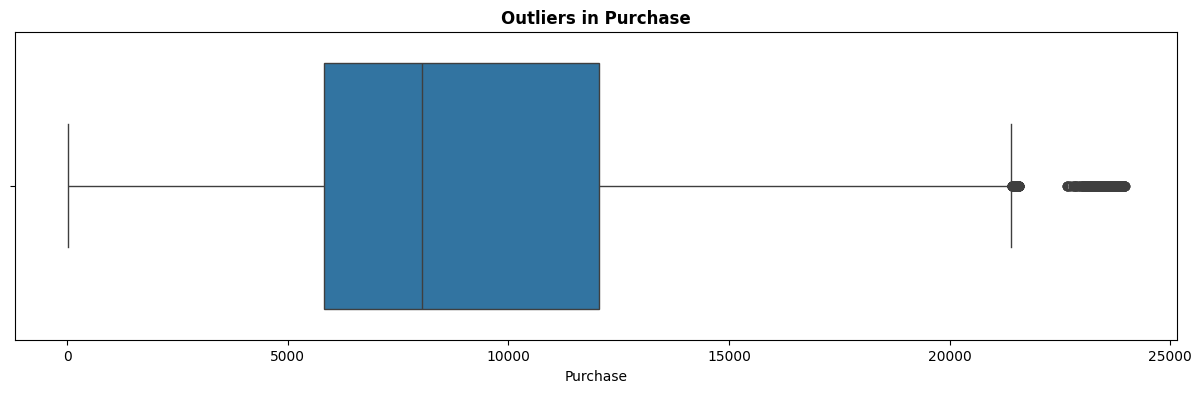

In [ ]:
plt.figure(figsize=(15,4))
plt.title("Outliers in Purchase",{'size':12,'weight':'bold'})
sns.boxplot(data['Purchase'],orient='h')
plt.show()

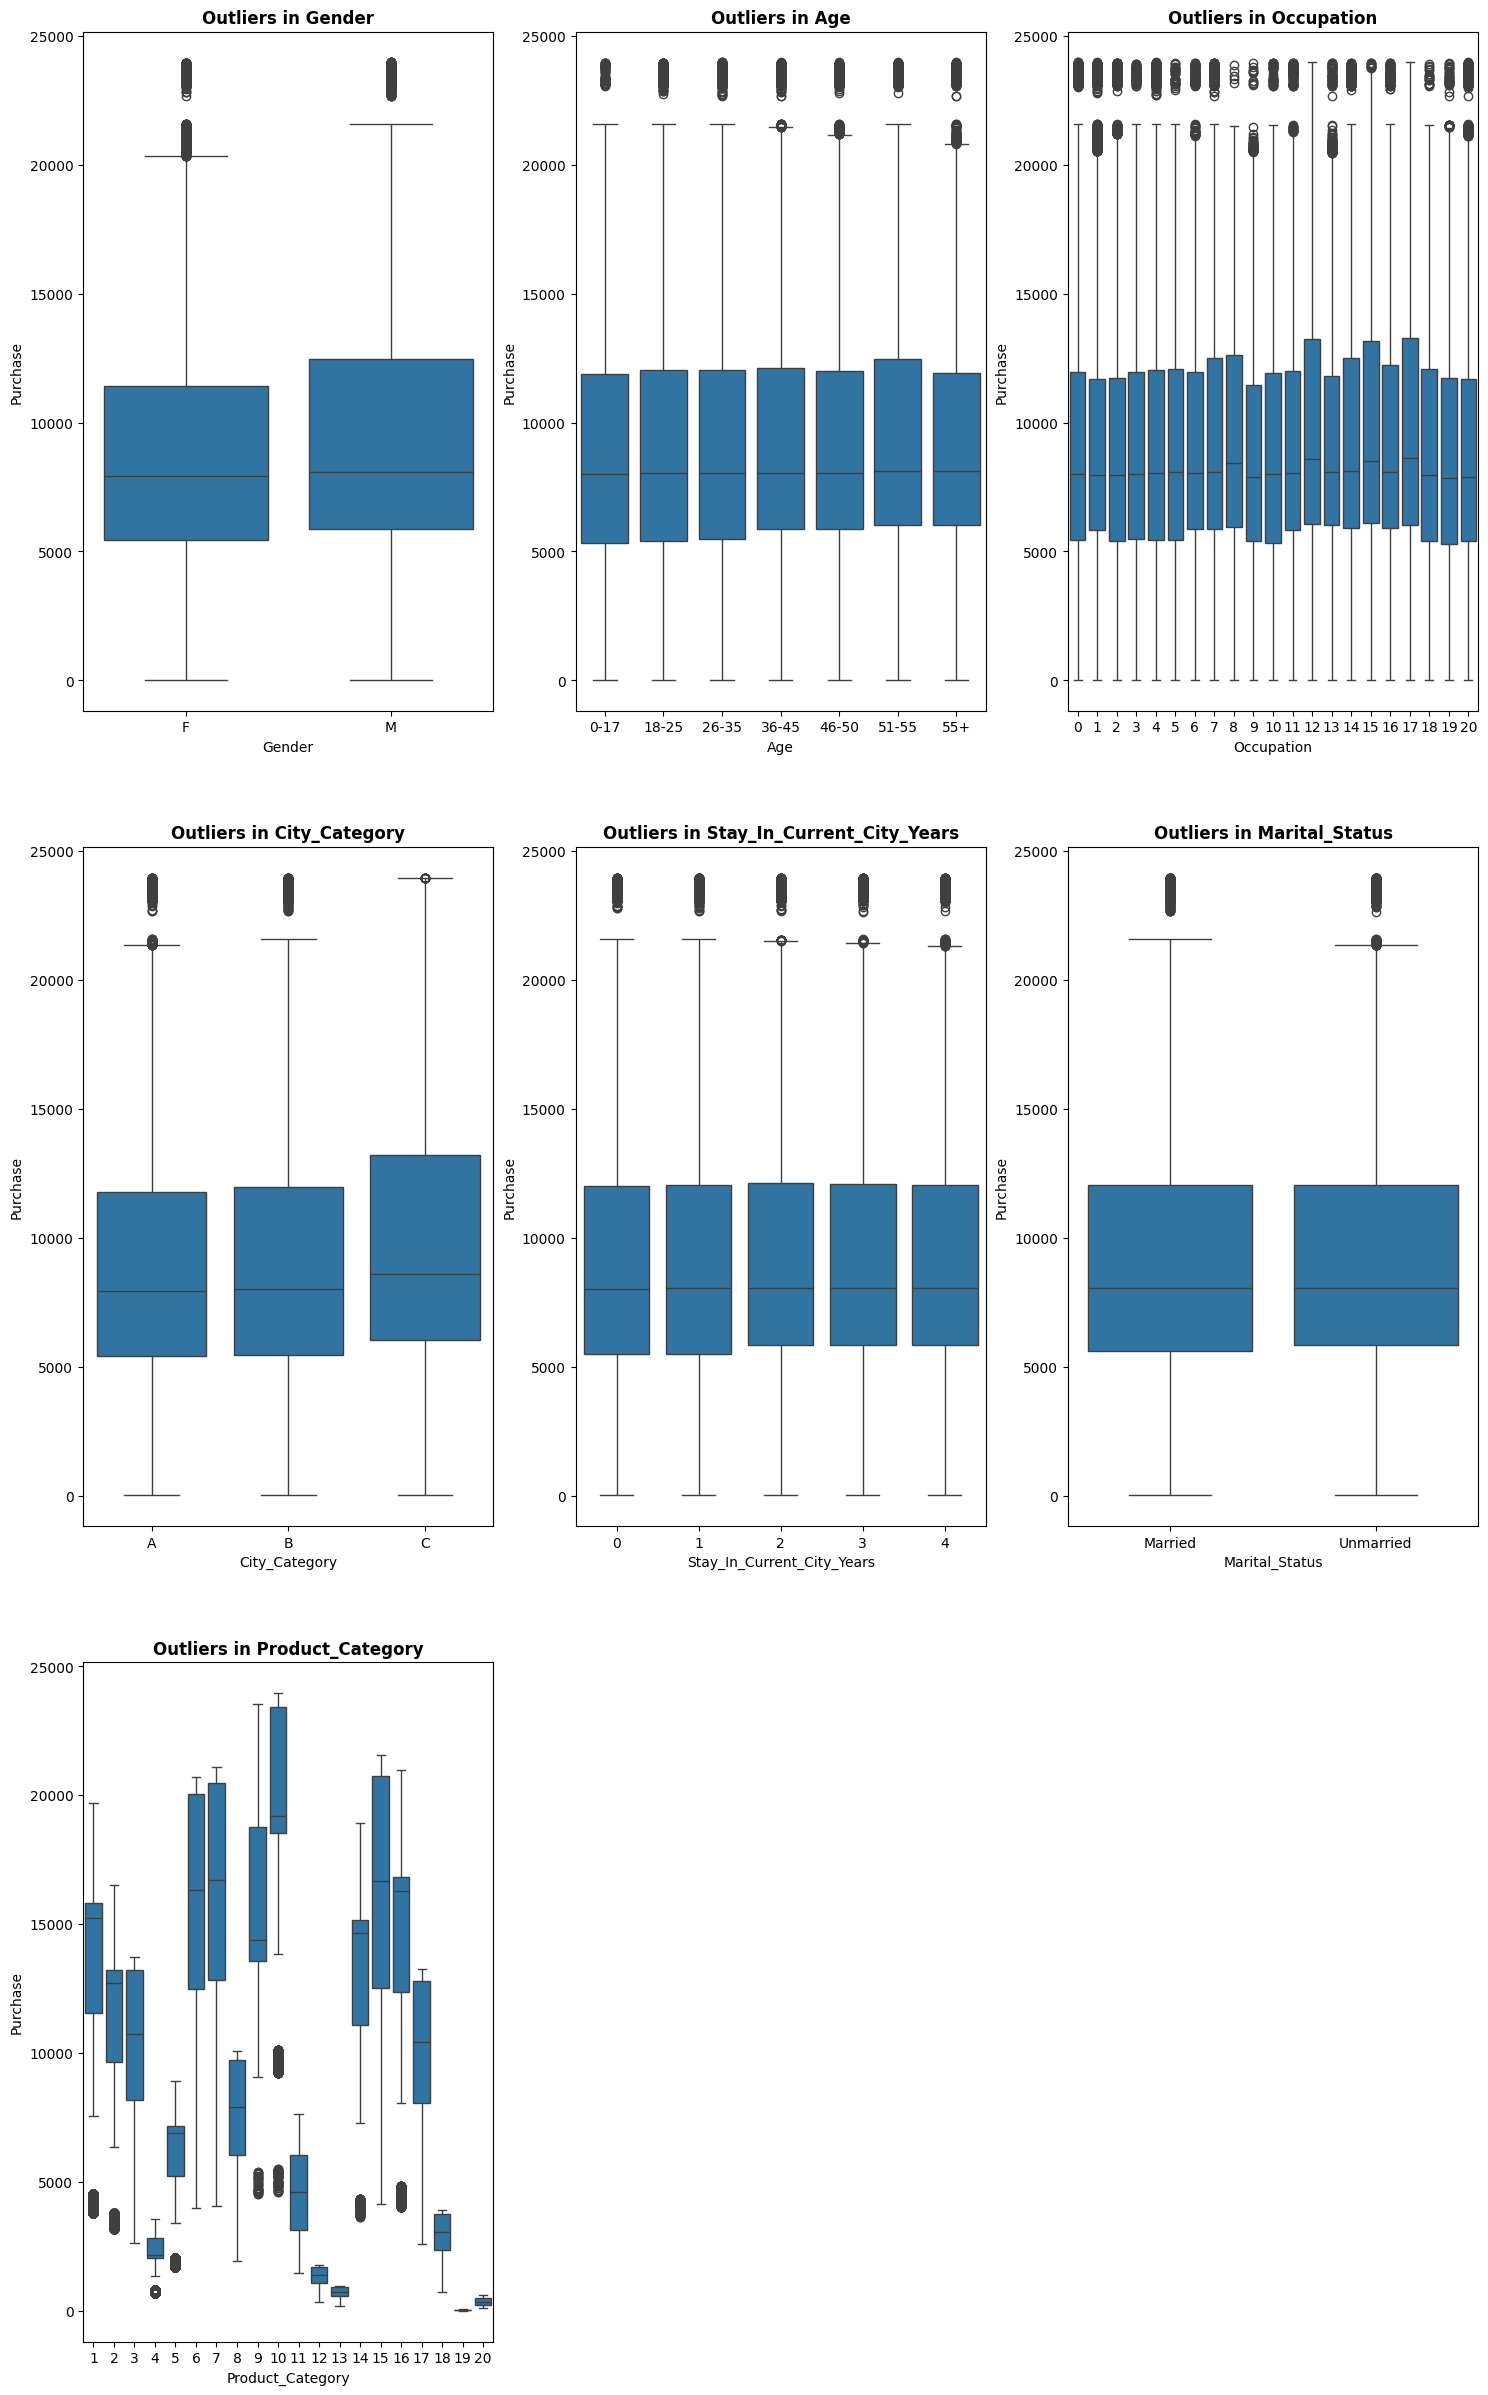

In [ ]:
columns=['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
plt.figure(figsize=(18,30))
ro = int(len(columns)/3)+1
for i in columns:
  plt.subplot(ro,3,columns.index(i)+1)
  plt.title(f"Outliers in {i}",{'size':12,'weight':'bold'})
  sns.boxplot(data=data,x=i,y='Purchase')
plt.show()

Except for Product Category(to be specific at Prodcut_category 10), for rest of the columns Outliers exist above 20000 in common.

**Checking for the outliers existence in the Product Category deeply.**

<Axes: xlabel='Purchase'>

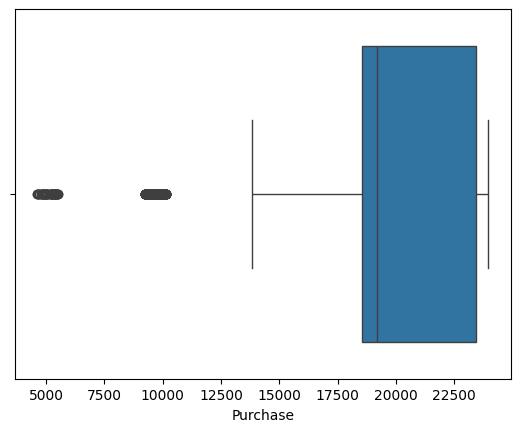

In [ ]:
sns.boxplot(data[data['Product_Category']==10]['Purchase'],orient='h')

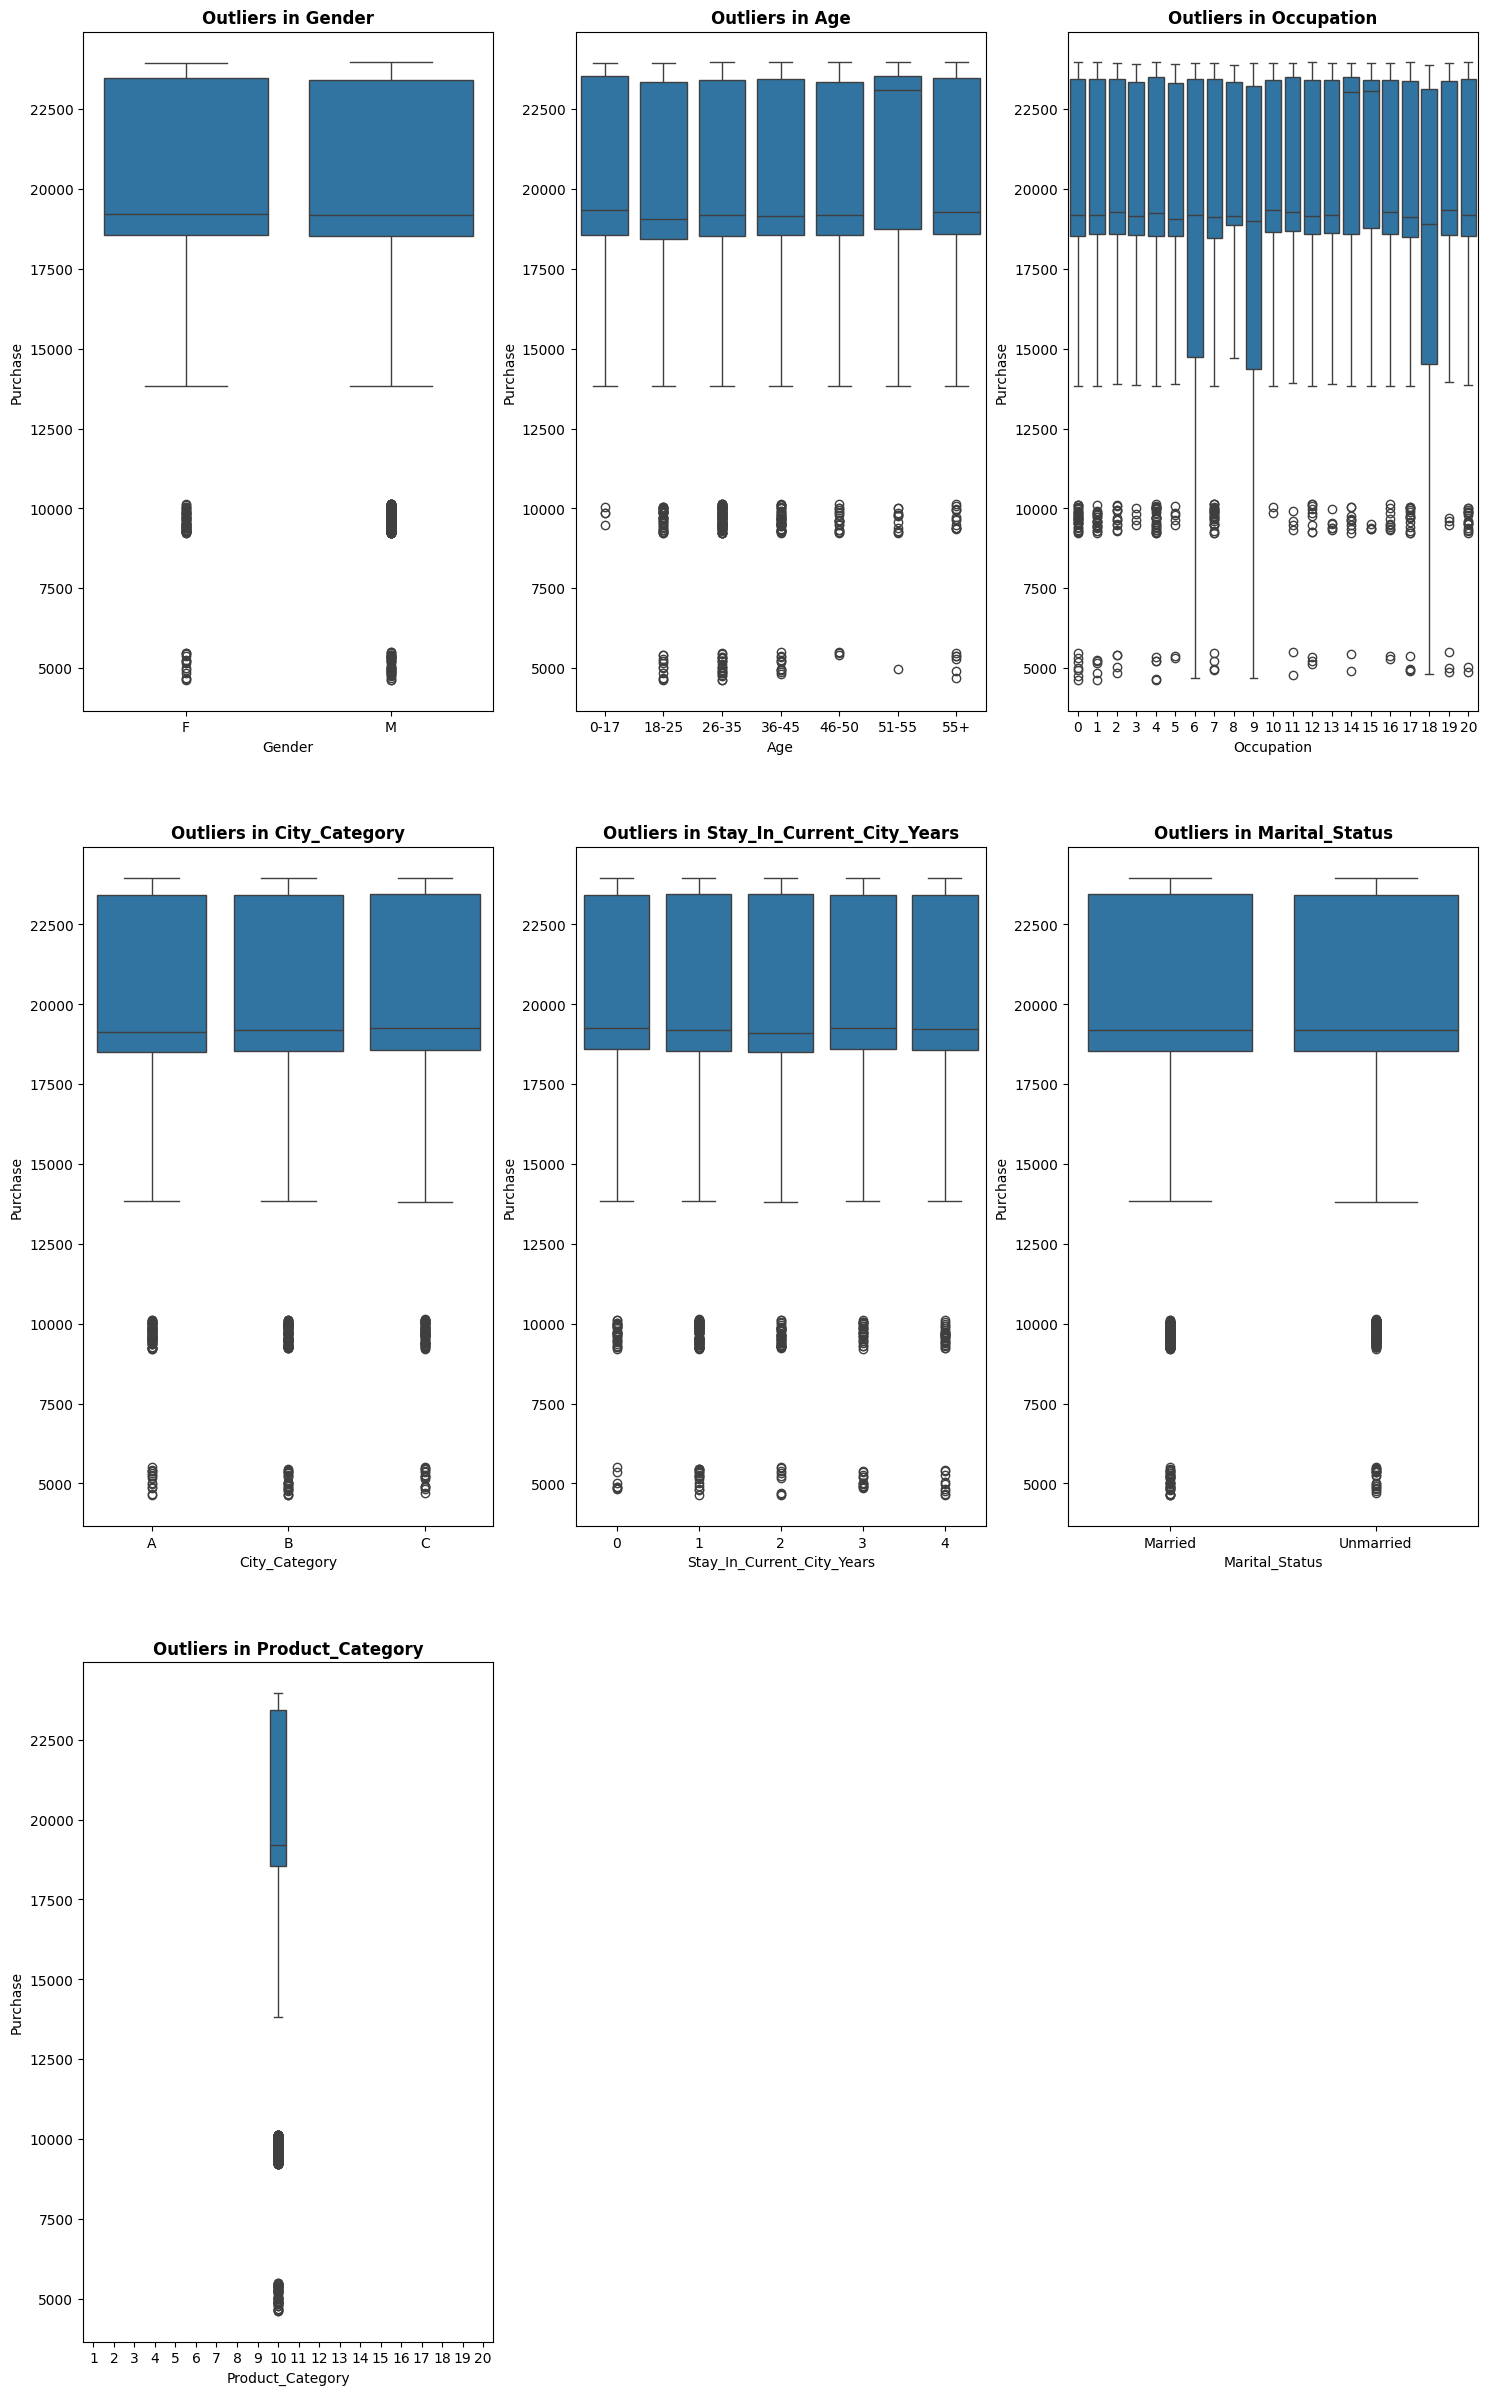

In [ ]:
columns=['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
plt.figure(figsize=(18,30))
ro = int(len(columns)/3)+1
for i in columns:
  plt.subplot(ro,3,columns.index(i)+1)
  plt.title(f"Outliers in {i}",{'size':12,'weight':'bold'})
  sns.boxplot(data=data[data['Product_Category']==10],x=i,y='Purchase')
plt.show()

In [ ]:
q3=np.percentile(data[data['Product_Category']==10]['Purchase'],75)
q1=np.percentile(data[data['Product_Category']==10]['Purchase'],25)
iqr = q3-q1
q3

23438.0

* So the outliers detected in other columns are actual values of product category 10. And outliers of the product caterogy 10 are the values of the other category.
* As this is correlated, removing those values could make a product category to disappear. So continuing on with given data.

**Calculating the count of Outliers**

In [ ]:
Q1 = np.percentile(data['Purchase'],25)
Q3 = np.percentile(data['Purchase'],75)
IQR = Q3 - Q1
left_whisker  = Q1 - (1.5 * IQR)
right_whisker = Q3 + (1.5 * IQR)
print("Left Whisker = ",left_whisker)
print("Q1 = ",Q1)
print("IQR = ",IQR)
print("Q3 = ",Q3)
print("Right Whisker = ",right_whisker)

Left Whisker =  -3523.5
Q1 =  5823.0
IQR =  6231.0
Q3 =  12054.0
Right Whisker =  21400.5


In [ ]:
Left_outlier_data = data[data['Purchase']<left_whisker]
Right_outlier_data = data[data['Purchase']>right_whisker]
Total = len(Left_outlier_data)+len(Right_outlier_data)
print("Left Outliers Count = ",len(Left_outlier_data))
print("Right Outliers Count = ",len(Right_outlier_data))
print("Total Outliers Count= ",Total)
print("Median = ",data['Purchase'].median())

Left Outliers Count =  0
Right Outliers Count =  2677
Total Outliers Count=  2677
Median =  8047.0


 **Insights**
 * Outliers
  * There are no outliers on the left but on the right.
  * There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the
 importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.
 * Distribution
  * Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD , with the median purchase amount being 8,047 USD .
 The lower limit of 12 USD while the upper limit of 21,399 USD reveal significant variability in customer spending
 As median is less than mean which tells that the distribution is Right Skewed.

# **Non-Graphical Analysis**

In [ ]:
data.describe(include='all')

User_ID Product_ID  Gender     Age  Occupation City_Category  \
count    550068.0     550068  550068  550068    550068.0        550068   
unique     5891.0       3631       2       7        21.0             3   
top     1001680.0  P00265242       M   26-35         4.0             B   
freq       1026.0       1880  414259  219587     72308.0        231173   
mean          NaN        NaN     NaN     NaN         NaN           NaN   
std           NaN        NaN     NaN     NaN         NaN           NaN   
min           NaN        NaN     NaN     NaN         NaN           NaN   
25%           NaN        NaN     NaN     NaN         NaN           NaN   
50%           NaN        NaN     NaN     NaN         NaN           NaN   
75%           NaN        NaN     NaN     NaN         NaN           NaN   
max           NaN        NaN     NaN     NaN         NaN           NaN   

        Stay_In_Current_City_Years Marital_Status  Product_Category  \
count                     550068.0         550068          550068.0   
unique                         5.0              2              20.0   
top                            1.0        Married               5.0   
freq                      193821.0         324731          150933.0   
mean                           NaN            NaN               NaN   
std                            NaN            NaN               NaN   
min                            NaN            NaN               NaN   
25%                            NaN            NaN               NaN   
50%                            NaN            NaN               NaN   
75%                            NaN            NaN               NaN   
max                            NaN            NaN               NaN   

             Purchase  
count   550068.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean      9263.968713  
std       5023.065394  
min         12.000000  
25%       5823.000000  
50%       8047.000000  
75%      12054.000000  
max      23961.000000

**Insights**
1. **User_ID** - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products. Out of which **1001680** is the most frequent with 1026 purchases.
2. **Product_ID** - Among 5,50,068 transactions there are 3631 unique products,with the product having the code **P00265242** being the highest seller , with a maximum of 1,880 units sold.
3. **Gender** - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.
4. **Age** - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future
5. **Stay_In_Current_City_Years** - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with
(0,2,3,4+) years of stay in current city
6. **Marital_Status** - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers .
7. **Occupation Type** - Occupation type 4 are showing more interest in Walmart shopping.
8. **City_Category** - B city category has the highest shopping purchase.
9. **Product_Category** - In 20 Product category listed, Product category type 5 is chosen to be shopped by the most on a scale of 150933 out of 550068.
10. **Purchase** - The average purchase value of each customer is 9263 dollars, and spends a minimum of 12 dollars to the maximum of 23961 dollars.

# **Graphical Analysis**

## *Univariate Analysis*

**Categorical Distributions**

In [ ]:
data.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

   Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                           2        Married                3      8370  
1                           2        Married                1     15200  
2                           2        Married               12      1422  
3                           2        Married               12      1057  
4                           4        Married                8      7969

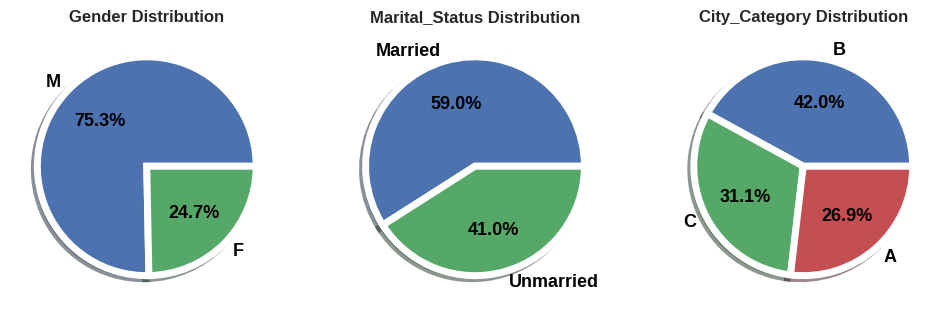

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth':5,'edgecolor':'white',"antialiased": True} ,textprops={'fontsize':13,'weight':'bold',"color":'black'})
plt.title('Gender Distribution',{'size':12,'weight':'bold'})
plt.subplot(1,3,2)
plt.pie(data['Marital_Status'].value_counts(),labels = data['Marital_Status'].value_counts().index,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth':5,'edgecolor':'white',"antialiased": True} ,textprops={'fontsize':13,'weight':'bold',"color":'black'})
plt.title('Marital_Status Distribution',{'size':12,'weight':'bold'})
plt.subplot(1,3,3)
plt.pie(data['City_Category'].value_counts(),labels = data['City_Category'].value_counts().index,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth':5,'edgecolor':'white',"antialiased": True} ,textprops={'fontsize':13,'weight':'bold',"color":'black'})
plt.title('City_Category Distribution',{'size':12,'weight':'bold'})
plt.show()

 * Gender Distribution - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.
 * Marital Status - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.
 *  City Category - City B saw the most number of transactions followed by City C and City A respectively

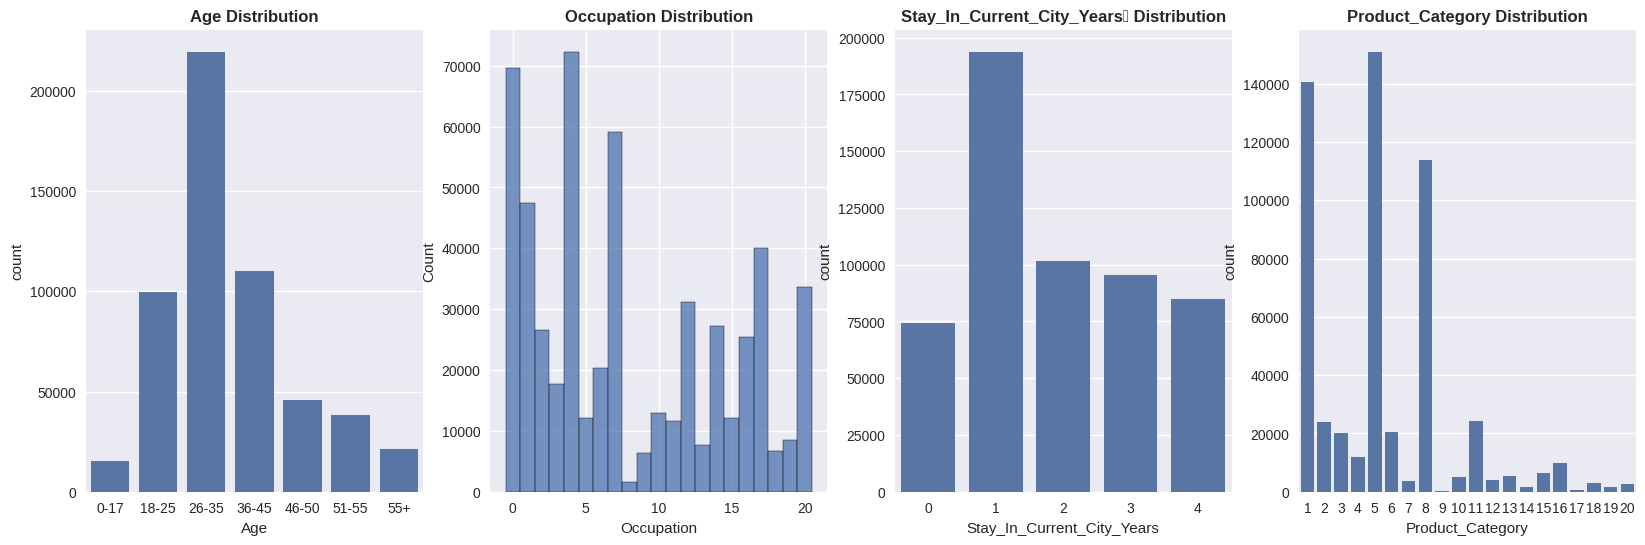

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('Age Distribution',{'weight':'bold'})
sns.countplot(data=data,x='Age')
plt.subplot(1,4,2)
plt.title('Occupation Distribution',{'weight':'bold'})
sns.histplot(data["Occupation"])
plt.subplot(1,4,3)
plt.title('Stay_In_Current_City_Years	 Distribution',{'weight':'bold'})
sns.countplot(data=data,x='Stay_In_Current_City_Years')
plt.subplot(1,4,4)
plt.title('Product_Category Distribution',{'weight':'bold'})
sns.countplot(data=data,x='Product_Category')
plt.show()

**Age Group Distribution**
* The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-agedadults are the most active and interested in
 shopping for deals and discounts .
* 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and
 preferences.
* The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments , with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product
 offerings to attract more customers from these age groups, especially the seniors and the children.

**Occupation Analysis**: Occupation '4' has the highest count, suggesting that customers with occupation '4' have the highest representation in the dataset. Occupations '0', '7', and '1' also have significant counts.

**City Residence Duration Impact**: Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing
 behavior.
* The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.
* The majority of the customers (49%) have stayed in the current city for one year or less . This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping
 options.
* 4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.
* The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions

**Product Category Purchase Analysis:** Product categories '1' and '5' followed by '8' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.

**Numerical Distributions**

As unique values in the data of numerical features are very high, lets findout the top 10 of each numerical.

**Top 10**

In [ ]:
Top10Products = data['Product_ID'].value_counts()[:10]
Top10ProductCategory = data['Product_Category'].value_counts()[:10]
Top10Occupation = data['Occupation'].value_counts()[:10]

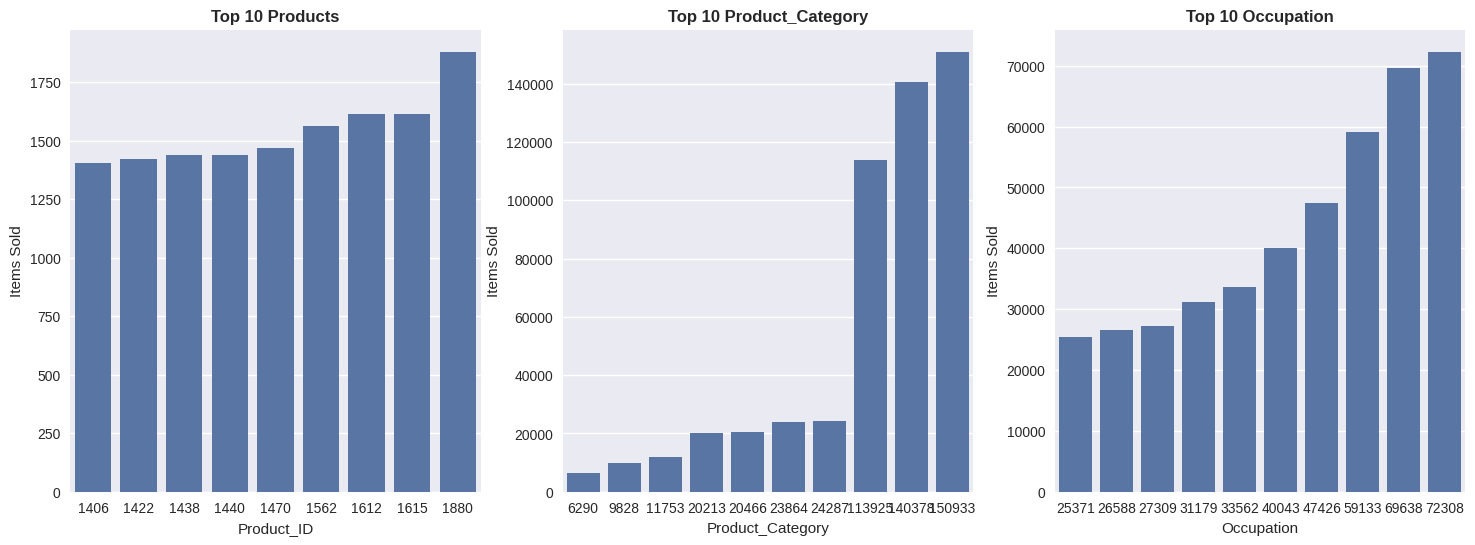

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.title('Top 10 Products',{'weight':'bold'})
sns.barplot(x=Top10Products,y=Top10Products.values)
plt.xlabel('Product_ID')
plt.ylabel('Items Sold')
plt.subplot(1,3,2)
plt.title('Top 10 Product_Category',{'weight':'bold'})
sns.barplot(x=Top10ProductCategory,y=Top10ProductCategory.values)
plt.xlabel('Product_Category')
plt.ylabel('Items Sold')
plt.subplot(1,3,3)
plt.title('Top 10 Occupation',{'weight':'bold'})
sns.barplot(x=Top10Occupation,y=Top10Occupation.values)
plt.xlabel('Occupation')
plt.ylabel('Items Sold')
plt.show()

**Insights**
 1. Top 10 Products Sold - The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many
 different customers like to buy.
 2. Top 10 Product Categories - Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among
 customers.
 3. Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have
 more disposable income to spend on Black Friday.

## *Bivariate Analysis*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  int64   
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(8), int64(2)
memory usage: 14.0 MB


In [ ]:
data.head()

User_ID Product_ID Gender   Age Occupation City_Category  \
0  1000001  P00069042      F  0-17         10             A   
1  1000001  P00248942      F  0-17         10             A   
2  1000001  P00087842      F  0-17         10             A   
3  1000001  P00085442      F  0-17         10             A   
4  1000002  P00285442      M   55+         16             C   

   Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
0                           2        Married                3      8370  
1                           2        Married                1     15200  
2                           2        Married               12      1422  
3                           2        Married               12      1057  
4                           4        Married                8      7969

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

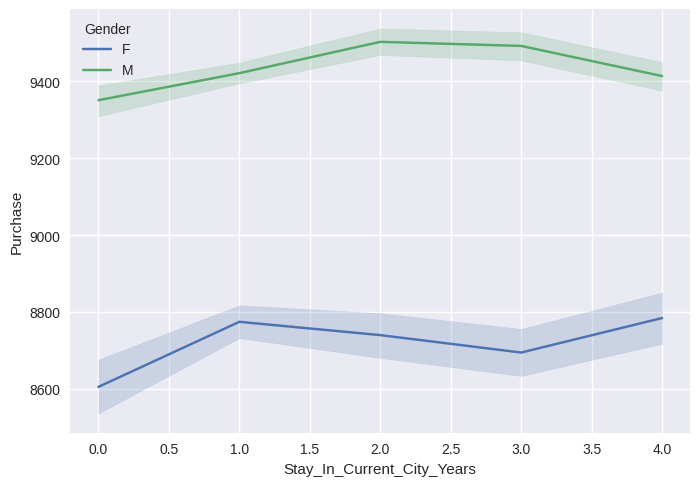

In [ ]:
sns.lineplot(data=data,x='Stay_In_Current_City_Years',y='Purchase',hue='Gender')

* Irrespective of the years of stay Male are showing more interest towards Walmart shopping and are almost spending similar amount of money every year.

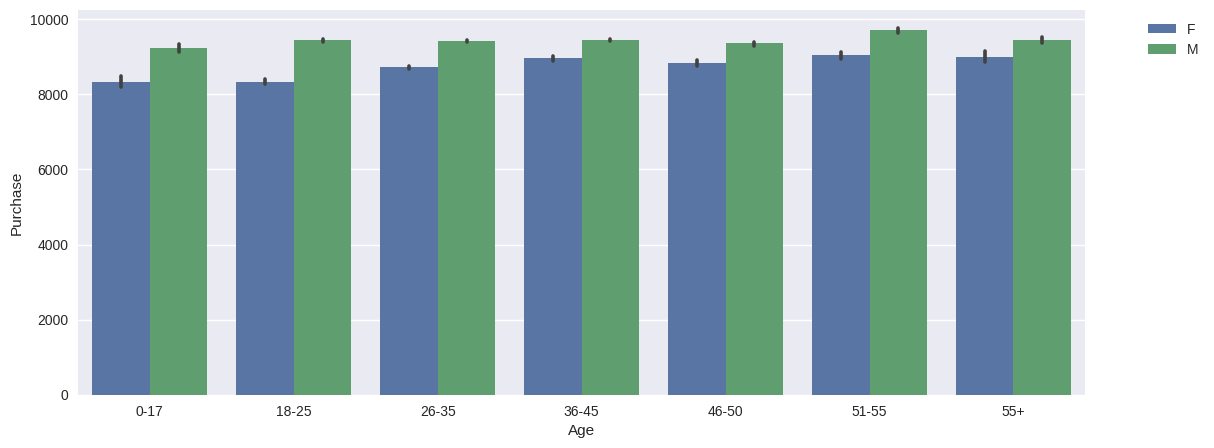

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(data=data,x='Age',y='Purchase',hue='Gender')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='upper left')
plt.show()

In all ages there a very significant difference between purchases done by male and female.

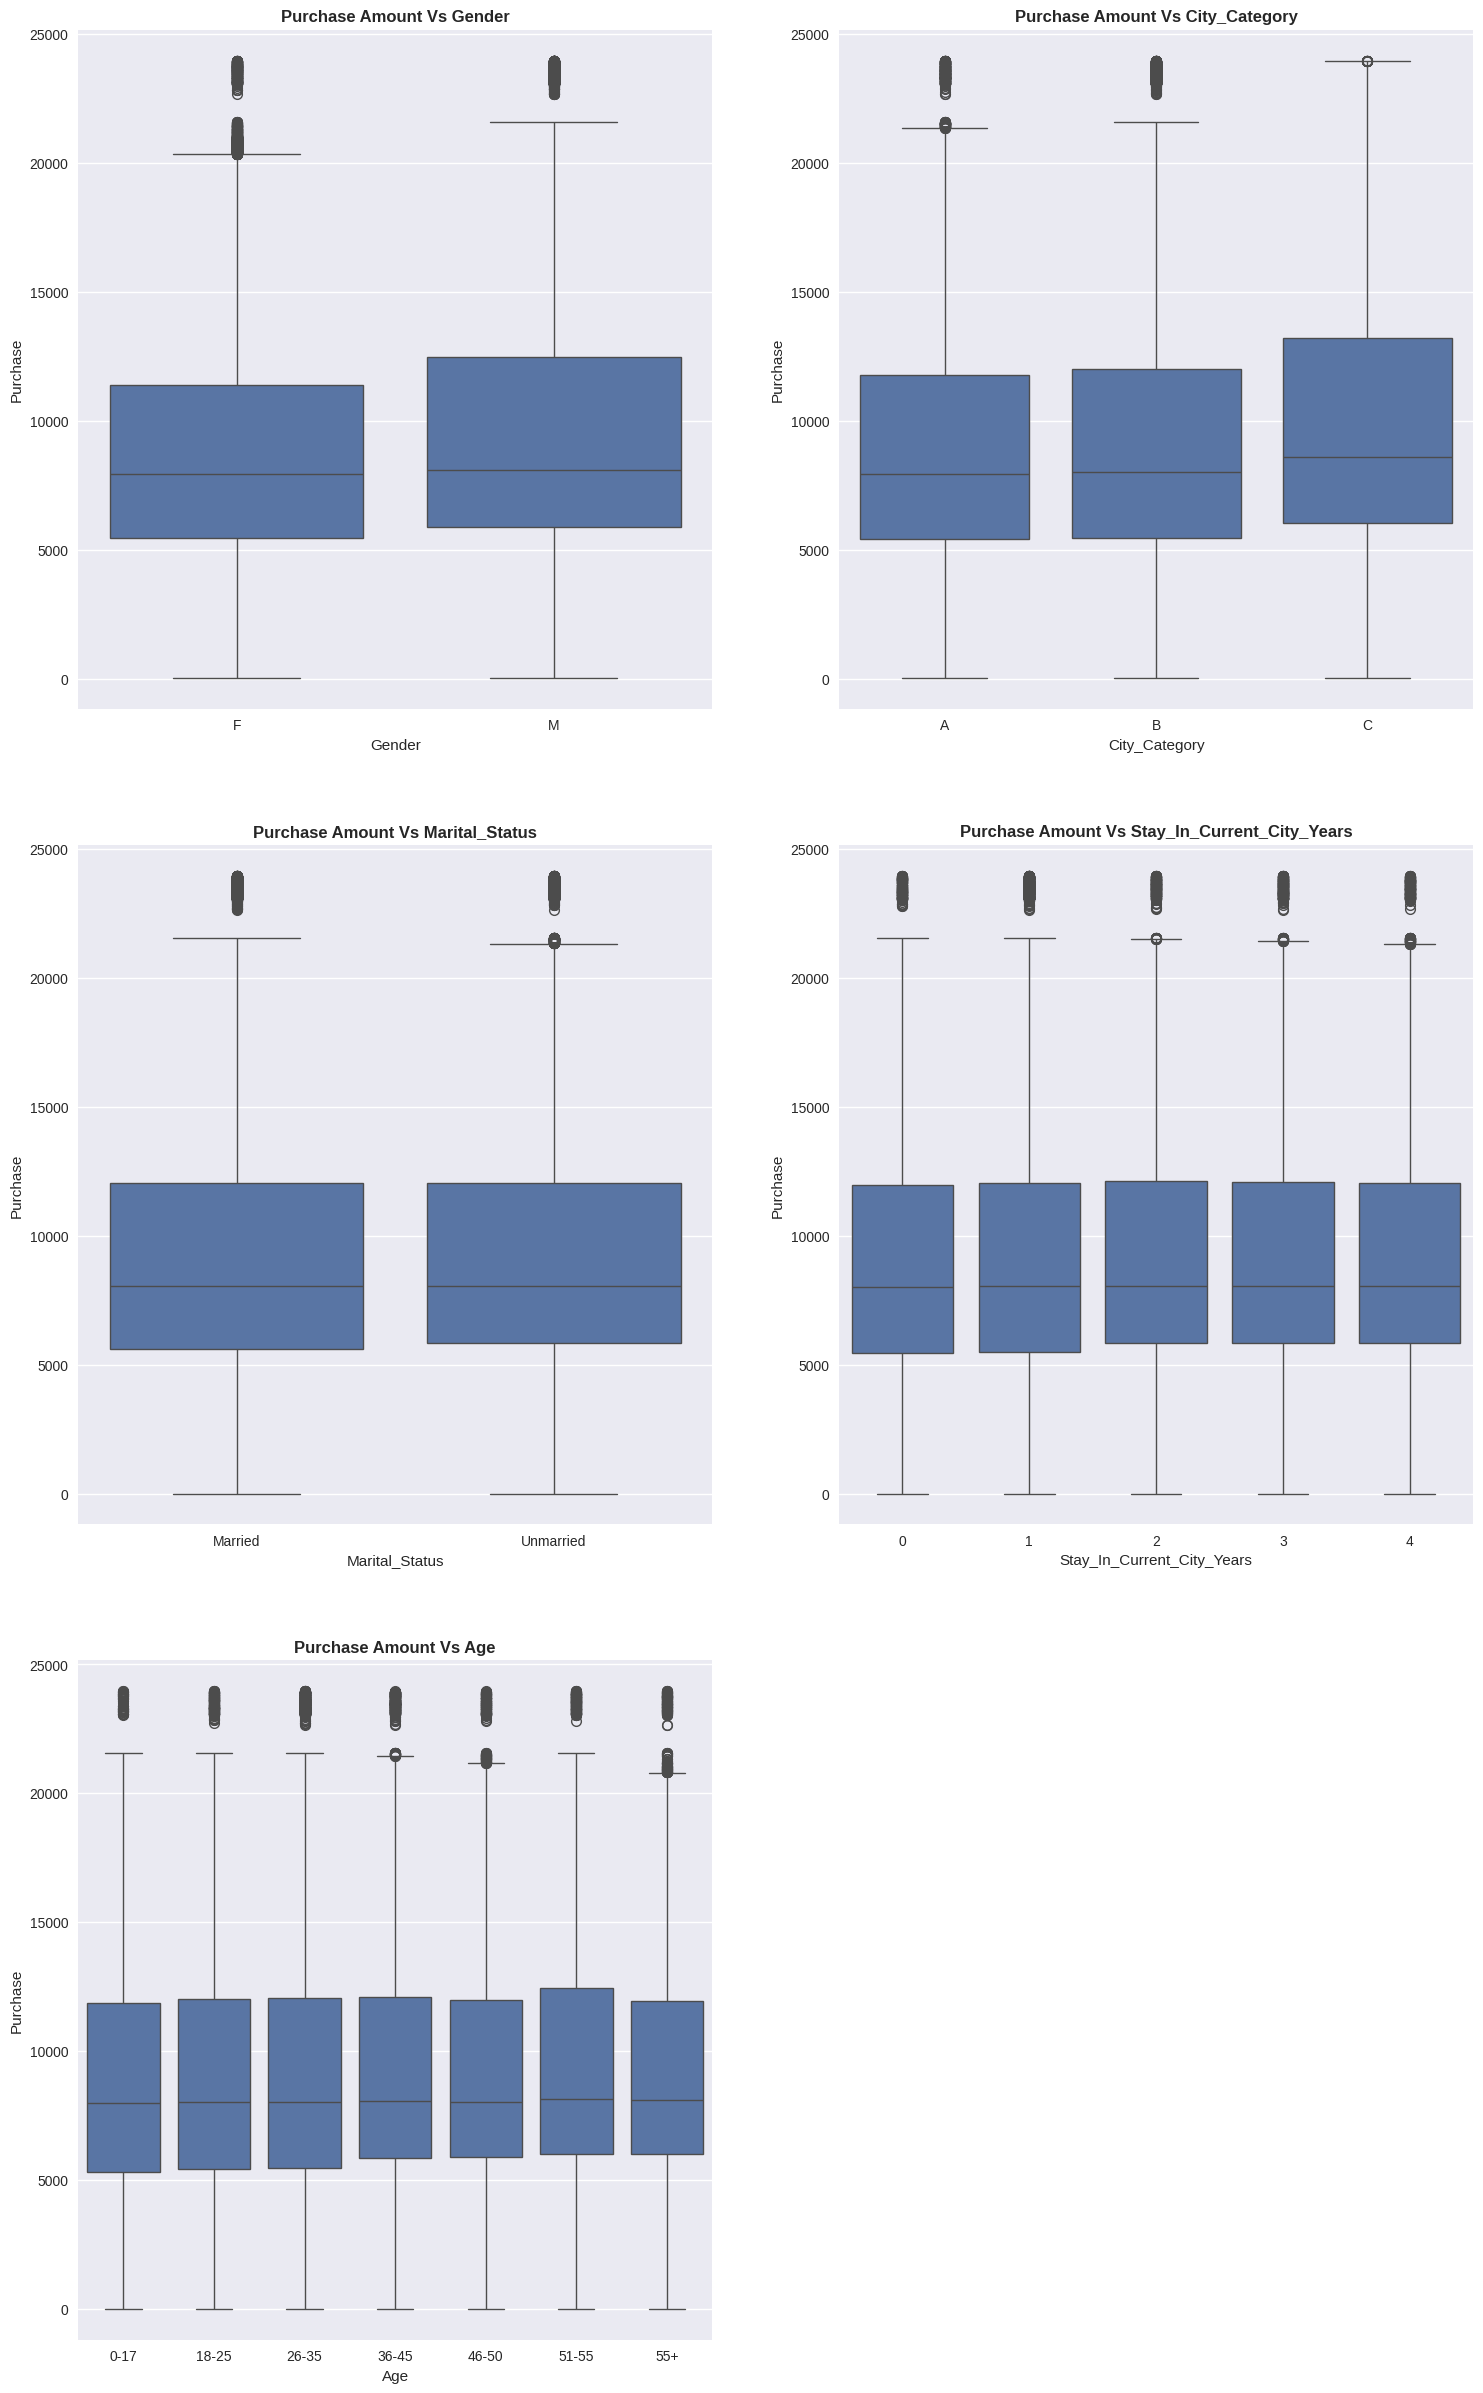

In [ ]:
columns = ['Gender','City_Category','Marital_Status','Stay_In_Current_City_Years','Age']
plt.figure(figsize=(18,30))
ro = int(len(columns)/2)+1
for i in columns:
  plt.subplot(ro,2,columns.index(i)+1)
  plt.title(f"Purchase Amount Vs {i}",{'size':12,'weight':'bold'})
  sns.boxplot(data=data,x=i,y='Purchase')
plt.show()

**Insights**
* Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As indicated in the data, the median purchase amount consistently hovers around 8,000 USD , regardless of the specific variablebeing examined.

# **CLT and Confidence Interval**

## *Who spent high in Walmart? (Male or Female)*

In [ ]:
#creating a df for purchase amount vs gender
total = data.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
#calculating the amount in billions
total['sum_in_billions'] = round(total['sum'] / 10**9,2)
#calculationg percentage distribution of purchase amount
total['%sum'] = round(total['sum']/total['sum'].sum(),3)
#calculationg per purchase amount
total['per_purchase'] = round(total['sum']/total['count'])
#renaming the gender
total['Gender'] = total['Gender'].replace({'F':'Female','M':'Male'})
total

Gender         sum   count  sum_in_billions   %sum  per_purchase
0  Female  1186232642  135809             1.19  0.233        8735.0
1    Male  3909580100  414259             3.91  0.767        9438.0

###  *Actual Data*

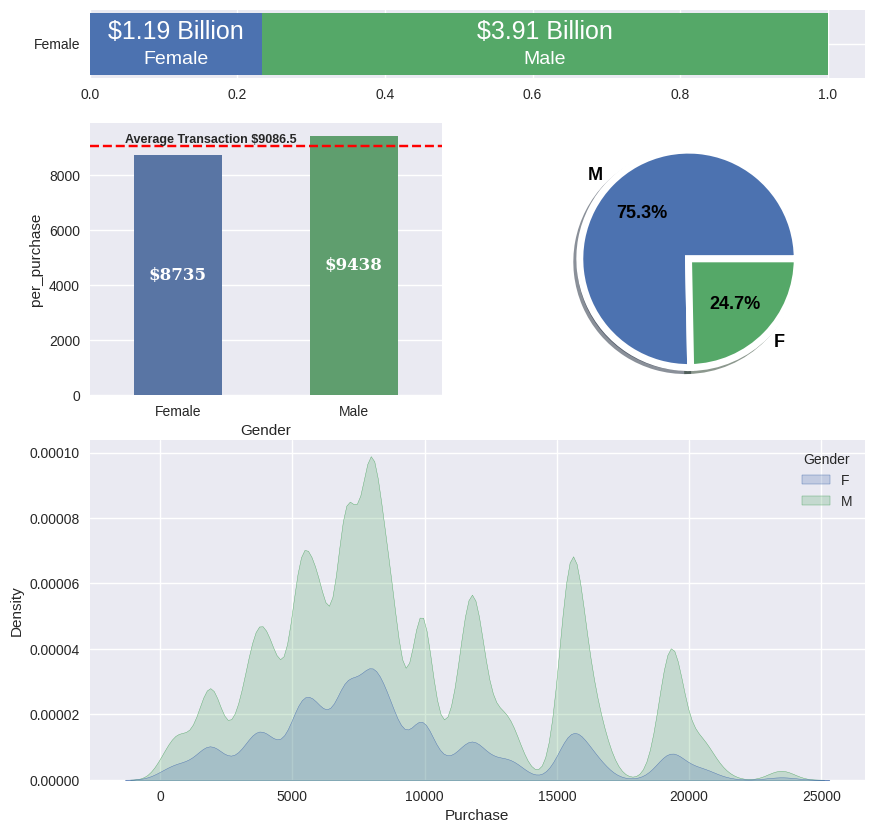

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])
ax= fig.add_subplot(gs[0,:])
ax.barh(total.loc[0,'Gender'],width = total.loc[0,'%sum'],label = 'Female')
ax.barh(total.loc[0,'Gender'],width = total.loc[1,'%sum'],left =total.loc[0,'%sum'], label = 'Male' )
ax.set_ylabel("")
txt = [0.0] #for left parameter in ax.text()
for i in total.index:
 #for amount
 ax.text(total.loc[i,'%sum']/2 + txt[0],0.15,f"${total.loc[i,'sum_in_billions']} Billion", va = 'center', ha='center',fontsize=18, color='white')
 #for gender
 ax.text(total.loc[i,'%sum']/2 + txt[0], -0.20 ,f"{total.loc[i,'Gender']}", va = 'center', ha='center',fontsize=14, color='white')
 txt += total.loc[i,'%sum']

ax1=fig.add_subplot(gs[1,0])
ax1.axhline(total['per_purchase'].mean(),color='red',linestyle='--')
ax1.text(-0.3,total['per_purchase'].mean()+100,f"Average Transaction ${total['per_purchase'].mean()}",{'fontsize':9,'fontweight':'bold'})
for i in total.index:
 ax1.text(total.loc[i,'Gender'],total.loc[i,'per_purchase']/2,f"${total.loc[i,'per_purchase']:.0f}", {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')
sns.barplot(data=total,x='Gender',y='per_purchase',ax=ax1,width=0.5,hue='Gender')

ax2=fig.add_subplot(gs[1,1])
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth':5,'edgecolor':'white',"antialiased": True} ,textprops={'fontsize':13,'weight':'bold',"color":'black'})
#plt.title('Gender Distribution',{'size':12,'weight':'bold'})

ax3=fig.add_subplot(gs[2,:])
sns.kdeplot(data=data,x='Purchase',hue='Gender',ax=ax3,fill=True)
plt.show()

**Insights**

1. Total Sales and Transactions Comparison
 - The total purchase amount and number of transactions by male customers was more than three times the amount and transactions by female customers indicating
that they had a more significant impact on the Black Friday sales.
2. Average Transaction Value
 - The average purchase amount per transaction was slightly higher for male customers than female customers (\$9438 vs \$8735) .
3. Distribution of Purchase Amount
 - As seen above, the purchase amount for both the genders is not normally distributed

 4. With a larger male customer base, it is likely that men will make more purchases compared to females.

 5.The higher sales among male customers could be attributed to a product range better suited to their preferences, leading to increased sales of products targeted towards men.

As seen above, the purchase amount for both the genders is not normally distributed.

Comparing the average purchase amounts:

Women (F) spend an average of 8,734.57 per transaction. Men (M) spend an average of 9,437.53
per transaction. No, women are not spending more money per transaction than men.
Analyzing the reasons why females are spending less money per transaction than men.

The key reasons why females are spending less money per transaction than men in the provided
dataset:-
1. **Gender Distribution:** There are significantly more male customers (414,259 than female customers (135,809) in the dataset. This difference in sample size can influence the average
spending per transaction, as larger sample sizes tend to have more stable and higher averages.
2. **Occupation Distribution:** The dataset shows that the gender distribution varies across different occupations. Some occupations have a higher representation of females, while others have
more males. These variations in occupation choices can affect the overall spending patterns.
3. **Product Category Preferences:** In most product categories, male customers make more purchases than female customers, resulting in higher counts for males. This suggests that males
might be buying more expensive products or spending more in certain product categories.
4. **Income Disparities:** Income disparities between genders, which are not directly reflected in
the dataset, can influence spending behavior. If males, on average, have higher incomes,they
may be more willing to spend more per transaction.
5. **Sample Size Impact:** The difference in the number of males and females in the dataset can
impact the overall average spending calculation. With a larger number of males, even small
differences in spending can lead to variations in the average.

### *Sample Data*

In [ ]:
np.random.choice(data[data['Gender']=='M']['Purchase'],size=100)

array([ 7805,  3552,  7393, 15813,  6911, 12721, 19353, 20097,  3190,
        5238,  7173,  4043, 19558, 10047,  5428,  5429,  4045,  4437,
        8044,  6084,  5233,  8583,  3160,  6973,  5917,  8658,  8205,
       11671,  4227,  5421,  7811, 19524, 16508,  5264,  8307, 15621,
        5333, 19646, 19897, 15626,  9990,  5229,  1663, 12002,  3552,
        7846,  7046,  7815,  8542,  8048, 11681, 12876,  7809, 11978,
        7973, 11596,  8603, 15944, 11950, 12094, 12273,   957, 19006,
       16581, 19577,  6927,  4686,  7553,  8007,  2178,  3464,  7867,
       19250,  8286, 15215,  5912, 15506, 12984,  9801,  3509,  6931,
        7609, 20752,  9799,  6935,  4205, 11636,  8288,  5151,  1466,
       15577, 16064,  7917,  7946,  4713, 23837, 15543, 10386,  7936,
        5388])

In [ ]:
def sampleCiClt(ci,sample_size):
  sample = 20000
  data_male = data[data['Gender']=='M']['Purchase']
  data_female = data[data['Gender']=='F']['Purchase']
  m_sample,f_sample = [],[]

  #applying CLT
  for i in range(sample):
      m_sample.append(np.mean(np.random.choice(data_male,size=sample_size)))
      f_sample.append(np.mean(np.random.choice(data_female,size=sample_size)))
  male_sample = pd.DataFrame({"Purchase":m_sample})
  female_sample = pd.DataFrame({"Purchase":f_sample})

  fig= plt.figure(figsize=(14,5))
  gs = fig.add_gridspec(1,2)
  ax= fig.add_subplot(gs[0,0])
  ax.set_title(f"Confidence Interval {ci}% for Sample size {sample_size}",{'weight':'bold'})
  sns.kdeplot(data=male_sample,x='Purchase',ax=ax,fill=True,label="Male")
  sns.kdeplot(data=female_sample,x='Purchase',ax=ax,fill=True,label="Female")
  plt.legend()

  plt.axvline(male_sample['Purchase'].mean(),color='red',linestyle='--')
  plt.axvline(female_sample['Purchase'].mean(),color='red',linestyle='--')
  mean_m = int(male_sample['Purchase'].mean())
  mean_f = int(female_sample['Purchase'].mean())
  left_m,right_m = np.percentile(male_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_f,right_f = np.percentile(female_sample['Purchase'],[(100-ci)/2,(100+ci)/2])

  line_data = [[int(left_m),mean_m,int(right_m)],[int(left_f),mean_f,int(right_f)]]
  data_m = ['Male',f'CI Range: ${int(left_m)} - ${int(right_m)}   Mean: ${mean_m}']
  data_f = ['Female',f'CI Range: ${int(left_f)} - ${int(right_f)}   Mean: ${mean_f}']
  for i in range(2):
    plt.axvline(line_data[i][0],color='blue',linestyle='--')
    plt.axvline(line_data[i][1],color='red',linestyle='--')
    plt.axvline(line_data[i][2],color='blue',linestyle='--')

  ax1 = fig.add_subplot(gs[0,1])
  ax1.axis('off')
  table = ax1.table(cellText=[data_m,data_f],loc='center',cellLoc='center',colLabels=["Gender",f"Confidence Interval {ci}% for Sample size {sample_size}"],colWidths=[0.25,0.8],bbox=[0.25,0.25,1,0.75])
  table.auto_set_font_size(False)
  table.set_fontsize(12)
  plt.show()

#### Confidence Interval for 90%

<Figure size 1500x4000 with 0 Axes>

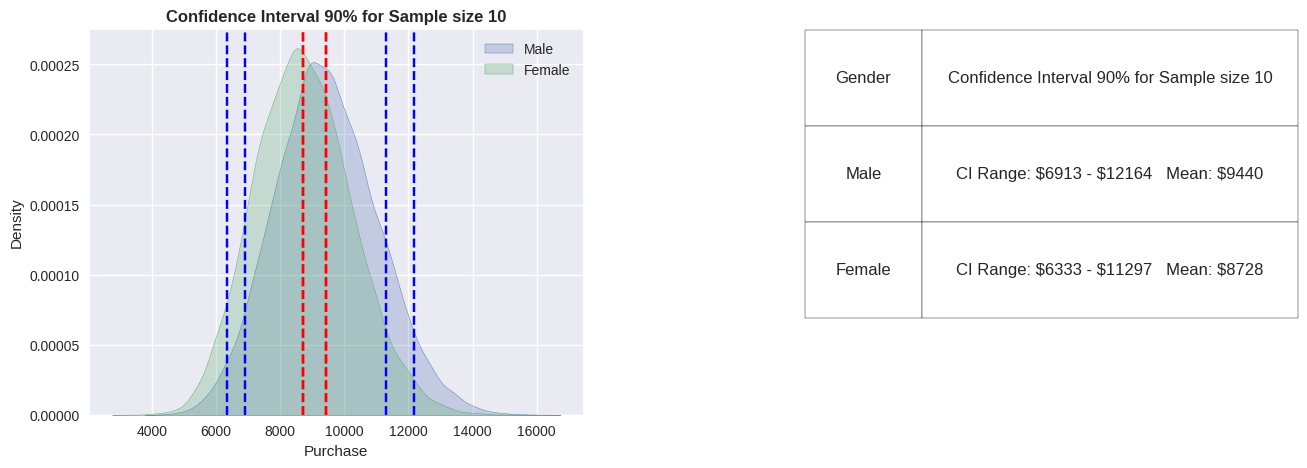

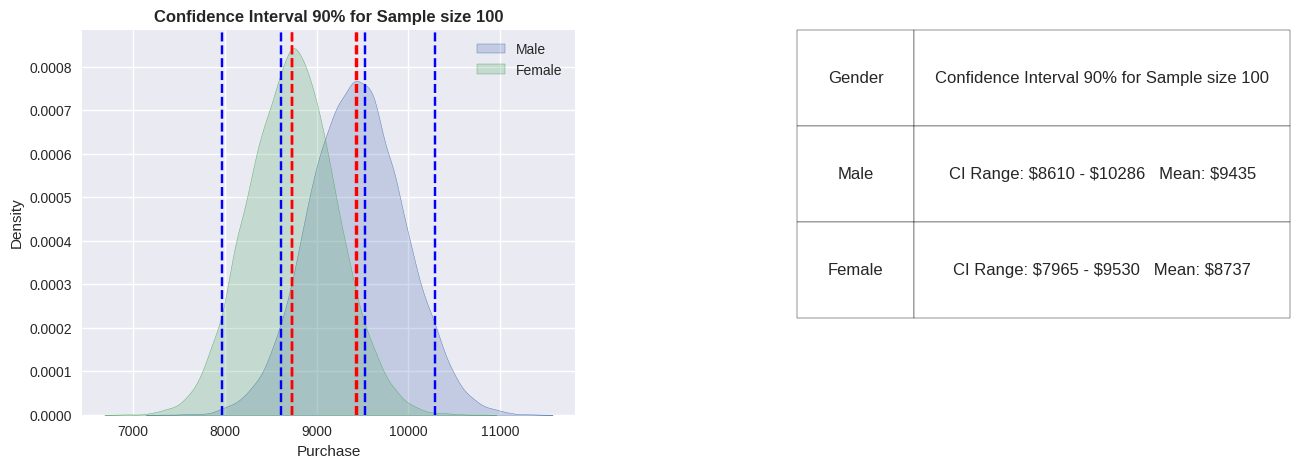

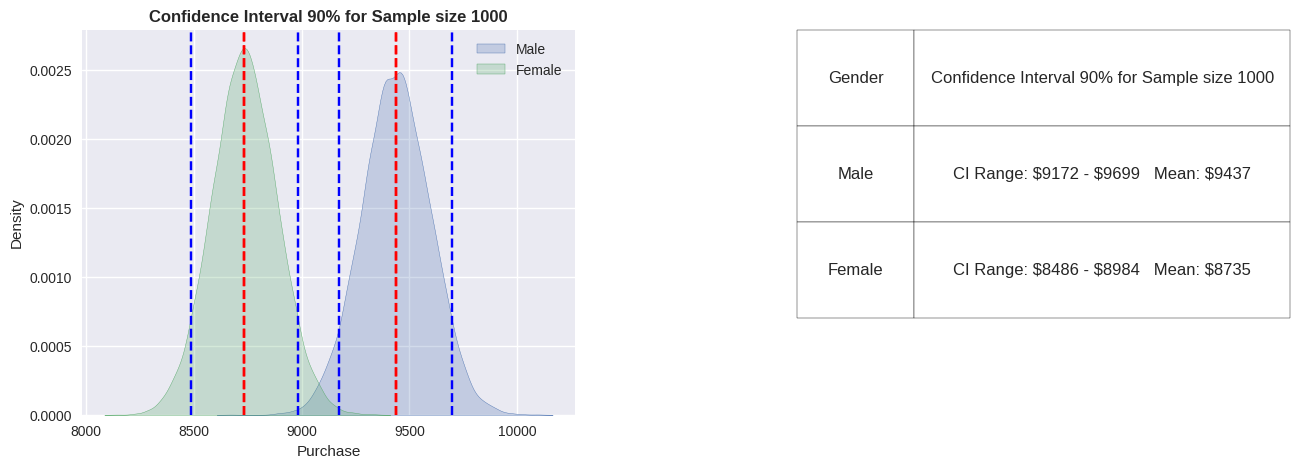

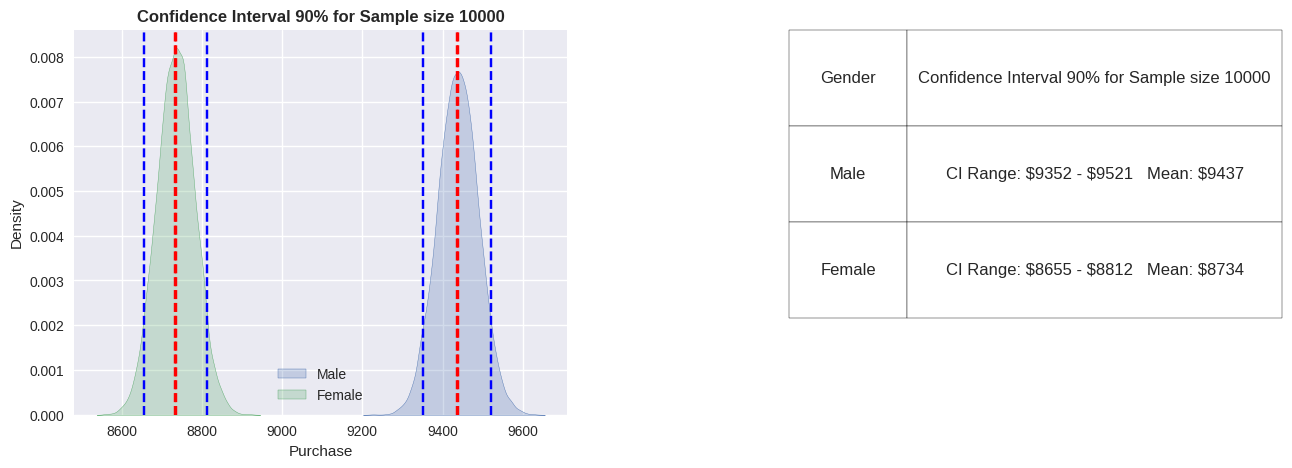

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=90,sample_size=i)

#### Confidence Interval for 95%

<Figure size 1500x4000 with 0 Axes>

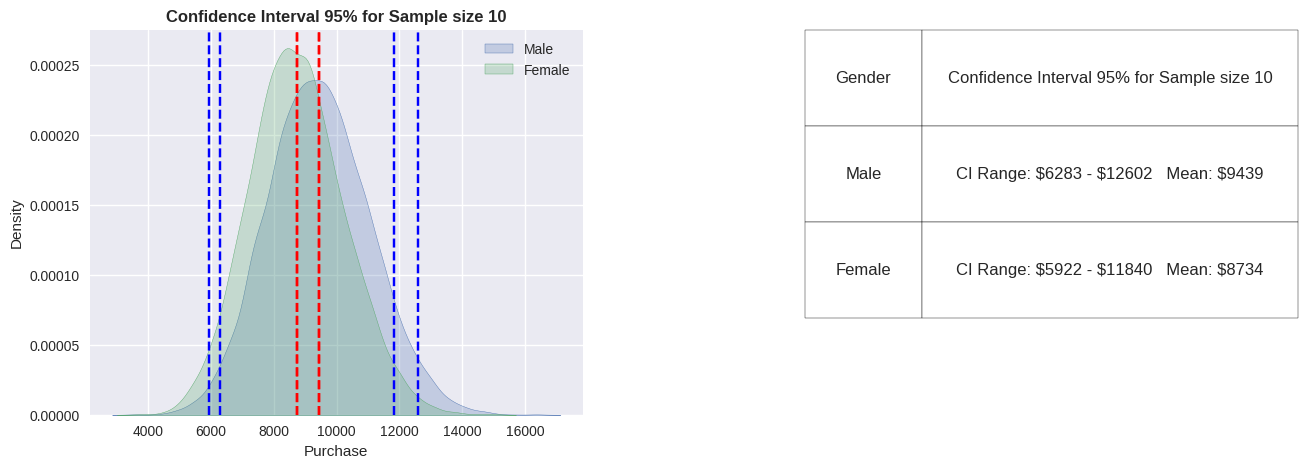

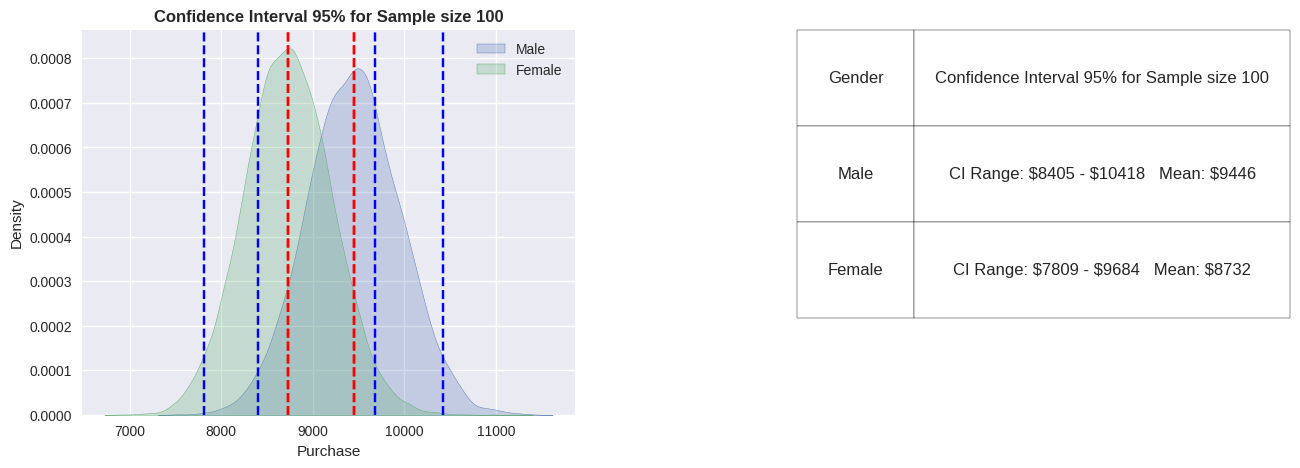

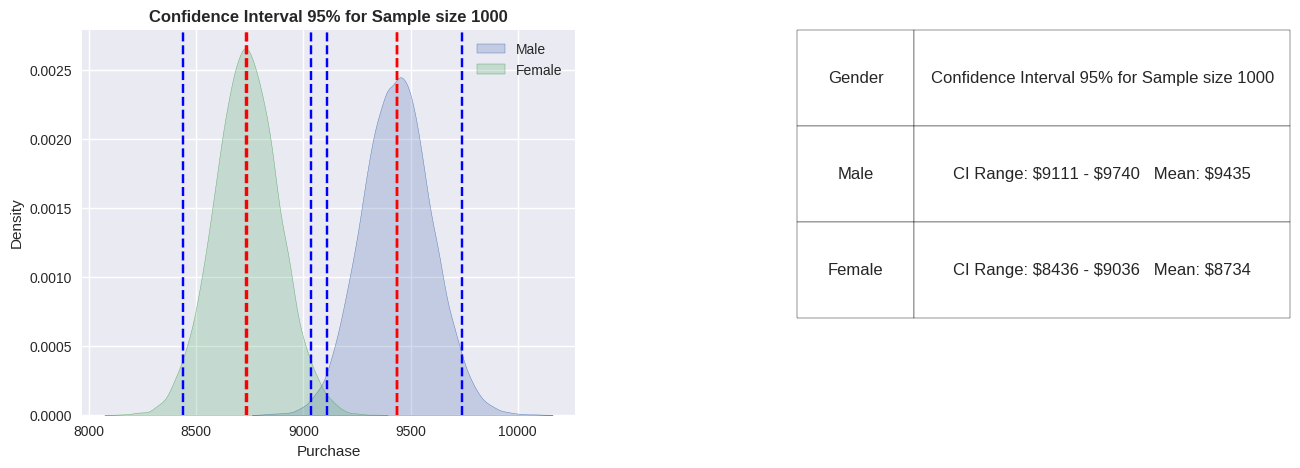

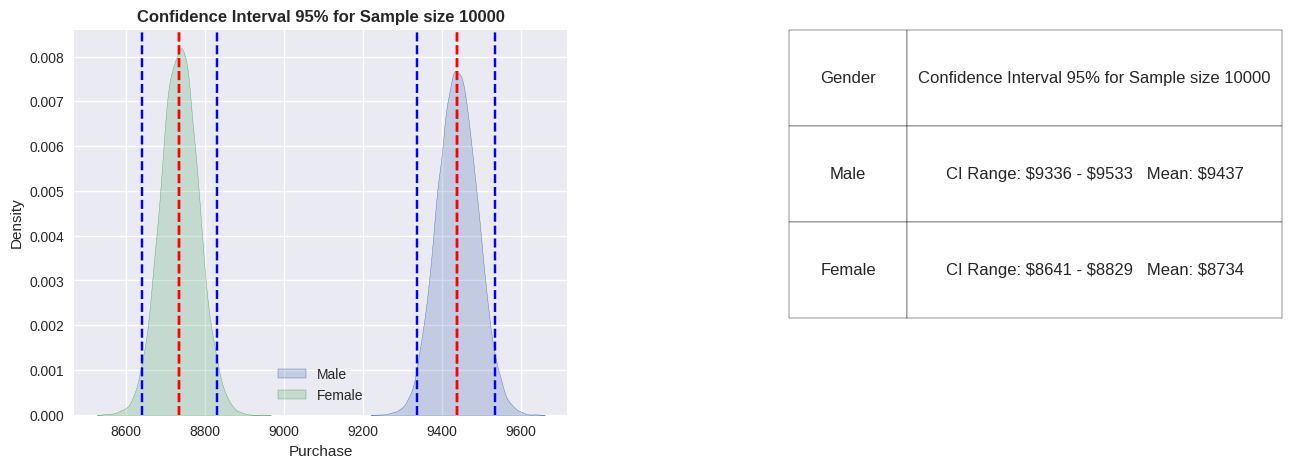

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=95,sample_size=i)

#### Confidence Interval for 99%

<Figure size 1500x4000 with 0 Axes>

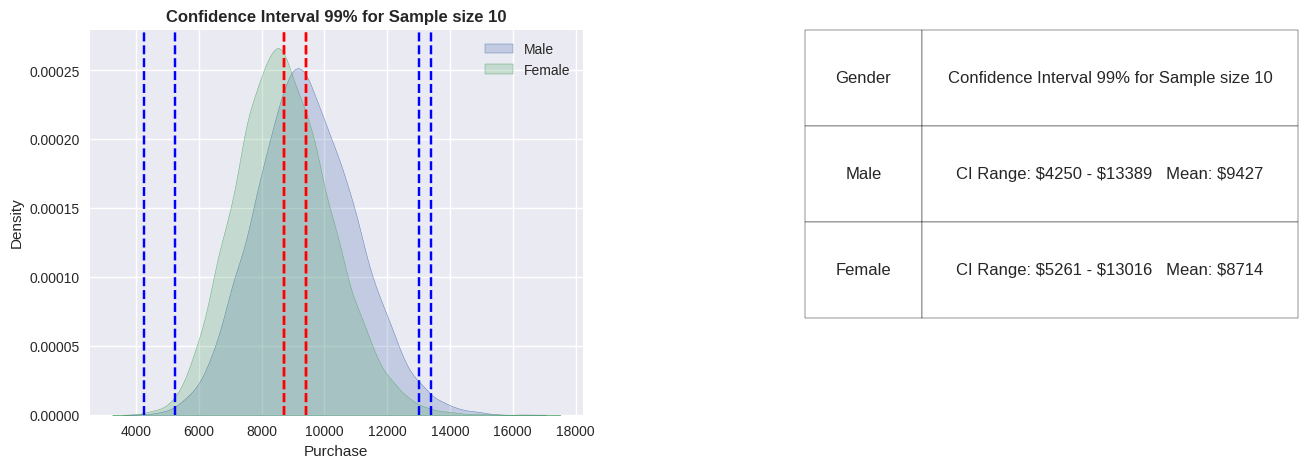

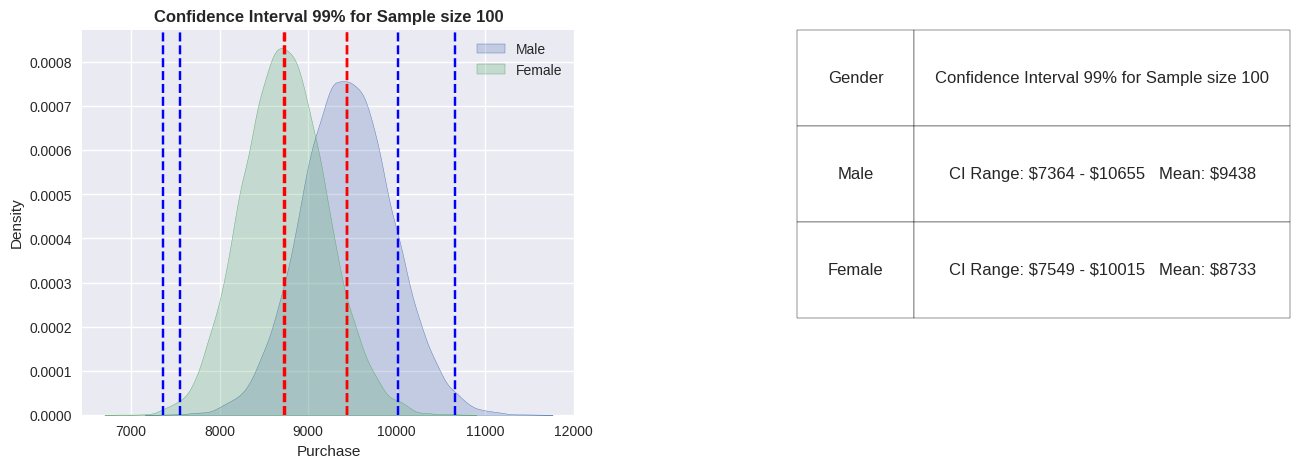

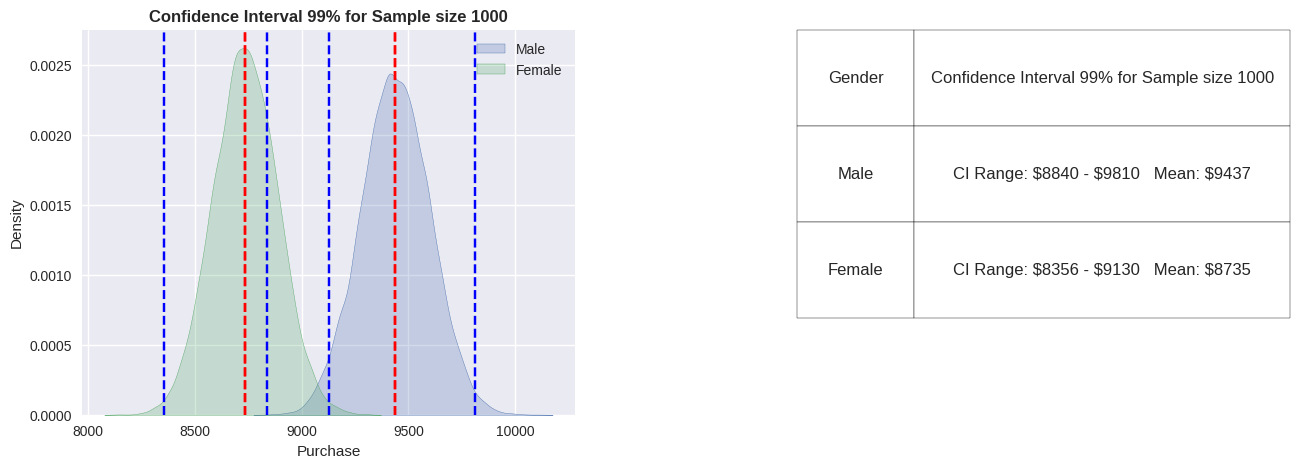

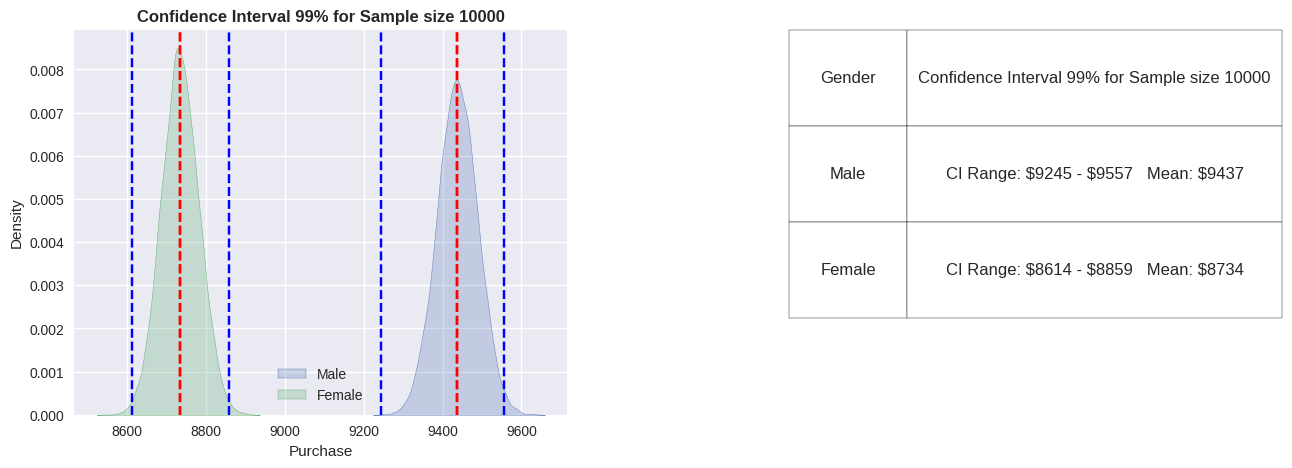

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=99,sample_size=i)

**Insights**

1. Sample Size

 - The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

 - From the above analysis, we can see that except for the Sample Size of 100, the confidence interval do not overlap as the sample size increases. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples.
3. Population Average

 - We are 95% confident that the true population average for males falls between $9,393 and $9,483, and for females, it falls between $8,692 and $8,777.
4. Women spend less

 - Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than those for women across different sample sizes.

**How can Walmart leverage this conclusion to make changes or improvements?**

 - Segmentation Opportunities

   - Walmart can create targeted marketing campaigns, loyalty programs, or product bundles to cater to the distinct spending behaviors of male and female customers. This approach may help maximize revenue from each customer segment.
 -  Pricing Strategies

   - Based on the above data of average spending per transaction by gender, they might adjust pricing or discount strategies to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

**Note** : Moving forward in our analysis, we will use 95% Confidence Level only.

## *Who spent high in Walmart? (Married or Unmarried)*

In [ ]:
#creating a df for purchase amount vs gender
total1 = data.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()
#calculating the amount in billions
total1['sum_in_billions'] = round(total1['sum'] / 10**9,2)
#calculationg percentage distribution of purchase amount
total1['%sum'] = round(total1['sum']/total1['sum'].sum(),3)
#calculationg per purchase amount
total1['per_purchase'] = round(total1['sum']/total1['count'])
total

Gender         sum   count  sum_in_billions   %sum  per_purchase
0  Female  1186232642  135809             1.19  0.233        8735.0
1    Male  3909580100  414259             3.91  0.767        9438.0

###  *Actual Data*

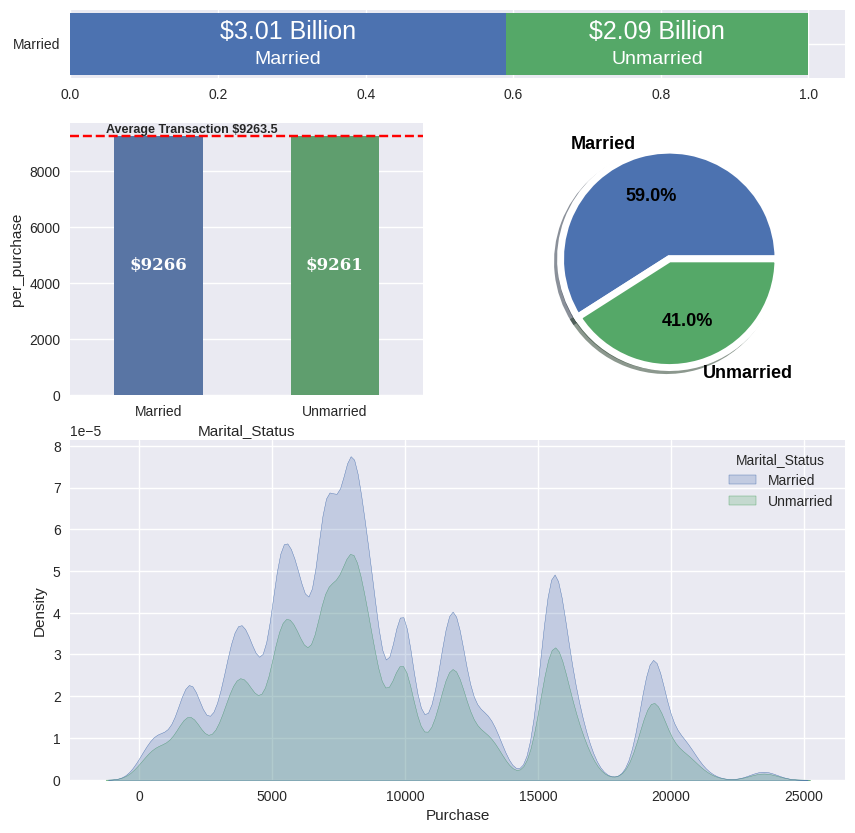

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])
ax= fig.add_subplot(gs[0,:])
ax.barh(total1.loc[0,'Marital_Status'],width = total1.loc[0,'%sum'],label = 'Married')
ax.barh(total1.loc[0,'Marital_Status'],width = total1.loc[1,'%sum'],left =total1.loc[0,'%sum'], label = 'Unmarried' )
ax.set_ylabel("")
txt = [0.0] #for left parameter in ax.text()
for i in total1.index:
 #for amount
 ax.text(total1.loc[i,'%sum']/2 + txt[0],0.15,f"${total1.loc[i,'sum_in_billions']} Billion", va = 'center', ha='center',fontsize=18, color='white')
 #for Marital_Status
 ax.text(total1.loc[i,'%sum']/2 + txt[0], -0.20 ,f"{total1.loc[i,'Marital_Status']}", va = 'center', ha='center',fontsize=14, color='white')
 txt += total1.loc[i,'%sum']

ax1=fig.add_subplot(gs[1,0])
ax1.axhline(total1['per_purchase'].mean(),color='red',linestyle='--')
ax1.text(-0.3,total1['per_purchase'].mean()+100,f"Average Transaction ${total1['per_purchase'].mean()}",{'fontsize':9,'fontweight':'bold'})
for i in total1.index:
 ax1.text(total1.loc[i,'Marital_Status'],total1.loc[i,'per_purchase']/2,f"${total1.loc[i,'per_purchase']:.0f}", {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')
sns.barplot(data=total1,x='Marital_Status',y='per_purchase',ax=ax1,width=0.5,hue='Marital_Status')

ax2=fig.add_subplot(gs[1,1])
plt.pie(data['Marital_Status'].value_counts(),labels = data['Marital_Status'].value_counts().index,autopct='%1.1f%%',shadow=True,wedgeprops={'linewidth':5,'edgecolor':'white',"antialiased": True} ,textprops={'fontsize':13,'weight':'bold',"color":'black'})
#plt.title('Marital_Status Distribution',{'size':12,'weight':'bold'})

ax3=fig.add_subplot(gs[2,:])
sns.kdeplot(data=data,x='Purchase',hue='Marital_Status',ax=ax3,fill=True)
plt.show()

**Insights**

1. Total Sales and Transactions Comparison

 - The total purchase amount and number of transactions by Unmarried customers was more than 20% the amount and transactions by married customers indicating that they had a more significant impact on the Black Friday sales.
2. Average Transaction Value

 - The average purchase amount per transaction was almost similar for married and unmarried customers ($9261 vs $9266).
3. Distribution of Purchase Amount

 - As seen above, the purchase amount for both married and unmarried customers is not normally distributed.

### *Sample Data*

In [ ]:
def sampleCiClt(ci,sample_size):
  sample = 20000
  data_married = data[data['Marital_Status']=='Married']['Purchase']
  data_unmarried = data[data['Marital_Status']=='Unmarried']['Purchase']
  m_sample,um_sample = [],[]

  #applying CLT
  for i in range(sample):
      m_sample.append(np.mean(np.random.choice(data_married,size=sample_size)))
      um_sample.append(np.mean(np.random.choice(data_unmarried,size=sample_size)))
  married_sample = pd.DataFrame({"Purchase":m_sample})
  unmarried_sample = pd.DataFrame({"Purchase":um_sample})

  fig= plt.figure(figsize=(14,5))
  gs = fig.add_gridspec(1,2)
  ax= fig.add_subplot(gs[0,0])
  ax.set_title(f"Confidence Interval {ci}% for Sample size {sample_size}",{'weight':'bold'})
  sns.kdeplot(data=married_sample,x='Purchase',ax=ax,fill=True,label="Married")
  sns.kdeplot(data=unmarried_sample,x='Purchase',ax=ax,fill=True,label="Unmarried")
  plt.legend()

  plt.axvline(married_sample['Purchase'].mean(),color='red',linestyle='--')
  plt.axvline(unmarried_sample['Purchase'].mean(),color='red',linestyle='--')
  mean_m = int(married_sample['Purchase'].mean())
  mean_f = int(unmarried_sample['Purchase'].mean())
  left_m,right_m = np.percentile(married_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_um,right_um = np.percentile(unmarried_sample['Purchase'],[(100-ci)/2,(100+ci)/2])

  line_data = [[int(left_m),mean_m,int(right_m)],[int(left_um),mean_f,int(right_um)]]
  data_m = ['Male',f'CI Range: ${int(left_m)} - ${int(right_m)}   Mean: ${mean_m}']
  data_f = ['Female',f'CI Range: ${int(left_um)} - ${int(right_um)}   Mean: ${mean_f}']
  for i in range(2):
    plt.axvline(line_data[i][0],color='blue',linestyle='--')
    plt.axvline(line_data[i][1],color='red',linestyle='--')
    plt.axvline(line_data[i][2],color='blue',linestyle='--')

  ax1 = fig.add_subplot(gs[0,1])
  ax1.axis('off')
  table = ax1.table(cellText=[data_m,data_f],loc='center',cellLoc='center',colLabels=["Gender",f"Confidence Interval {ci}% for Sample size {sample_size}"],colWidths=[0.25,0.8],bbox=[0.25,0.25,1,0.75])
  table.auto_set_font_size(False)
  table.set_fontsize(12)
  plt.show()

#### Confidence Interval for 90%

<Figure size 1500x4000 with 0 Axes>

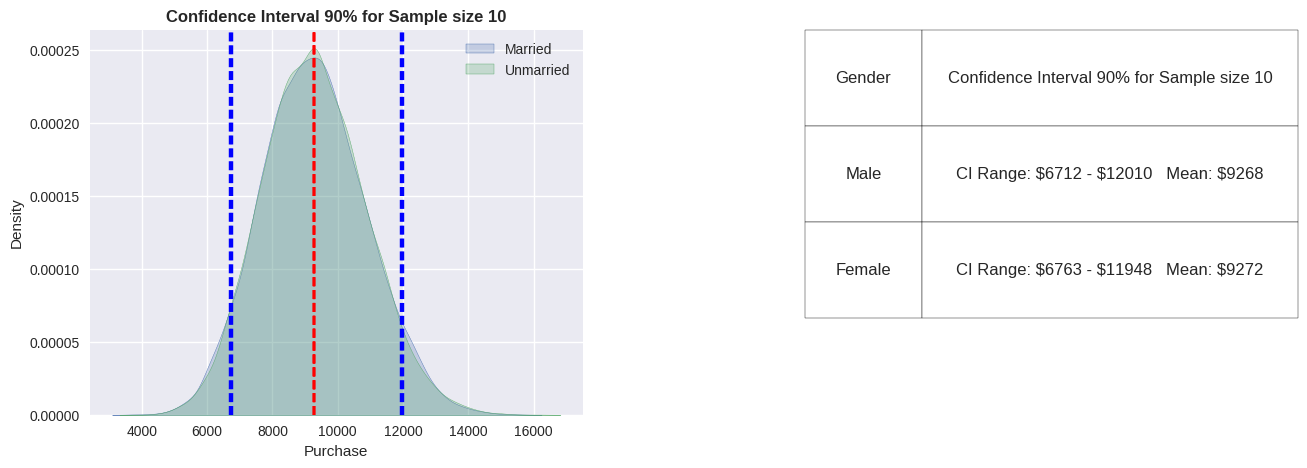

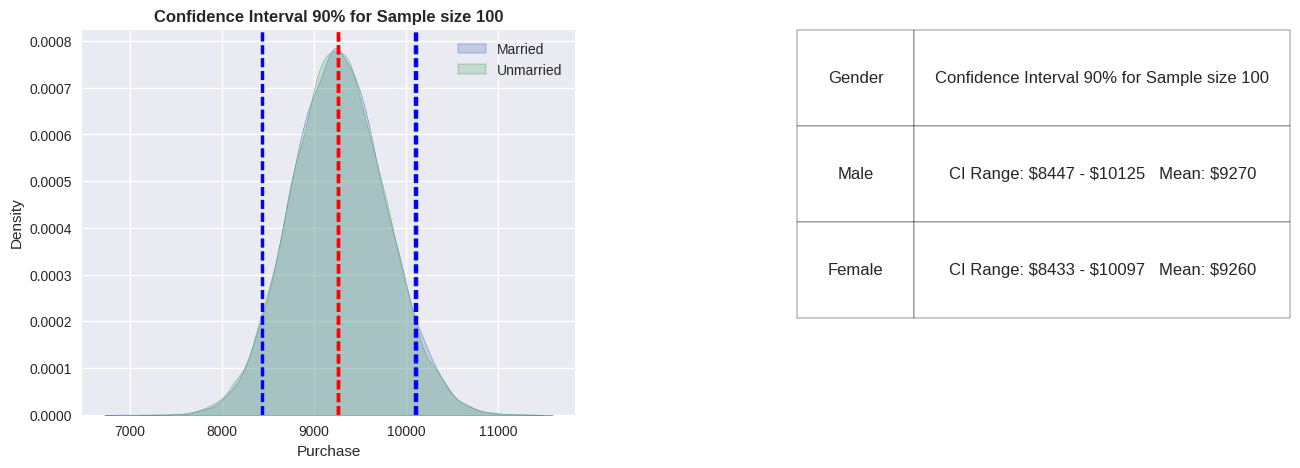

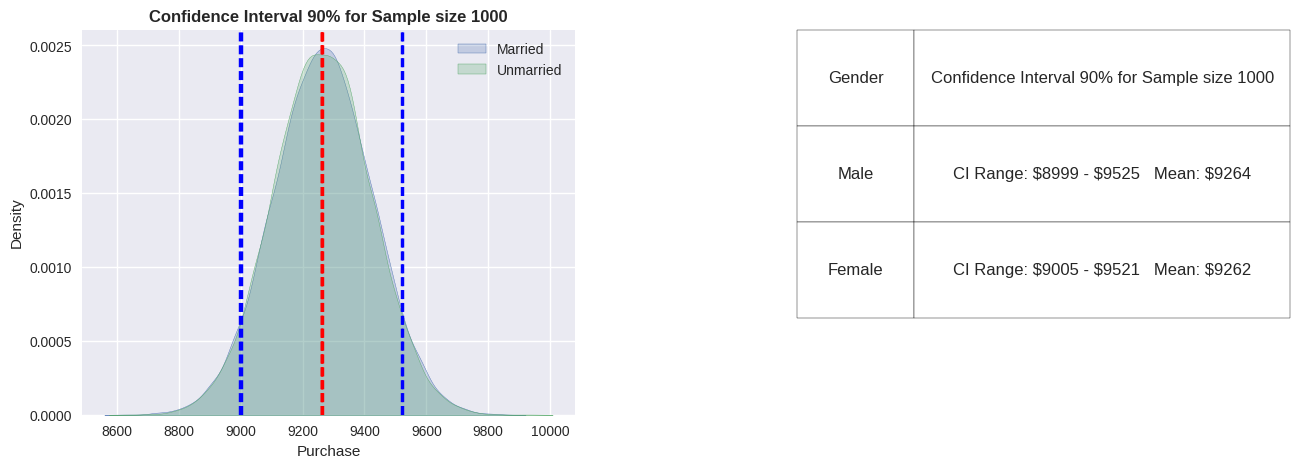

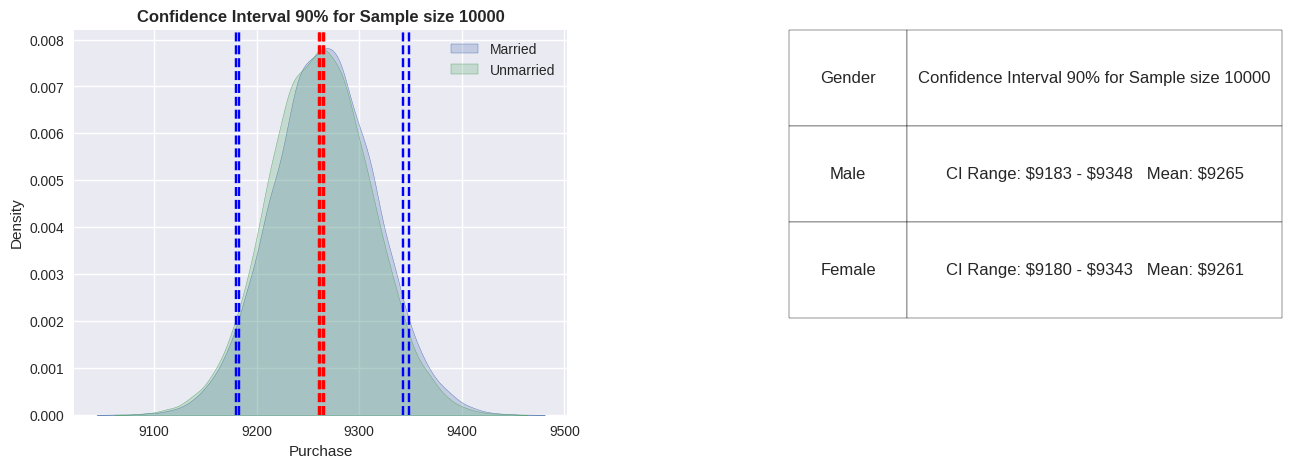

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=90,sample_size=i)

#### Confidence Interval for 95%

<Figure size 1500x4000 with 0 Axes>

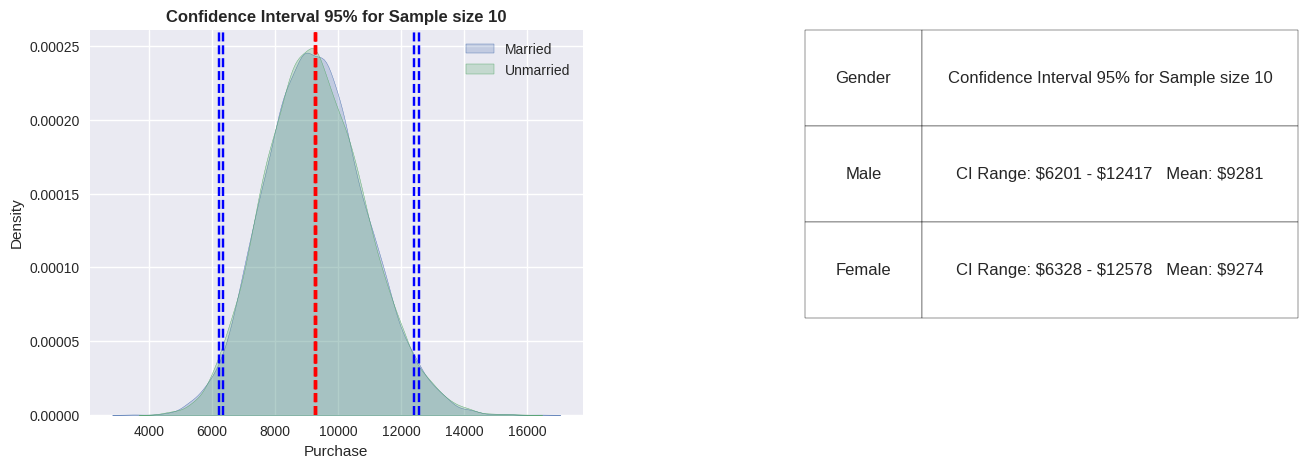

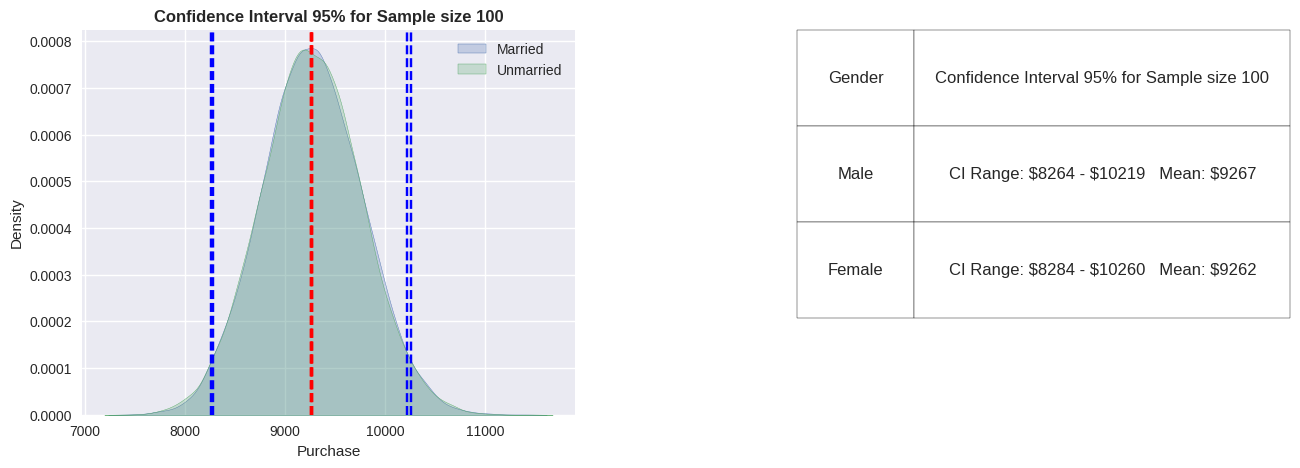

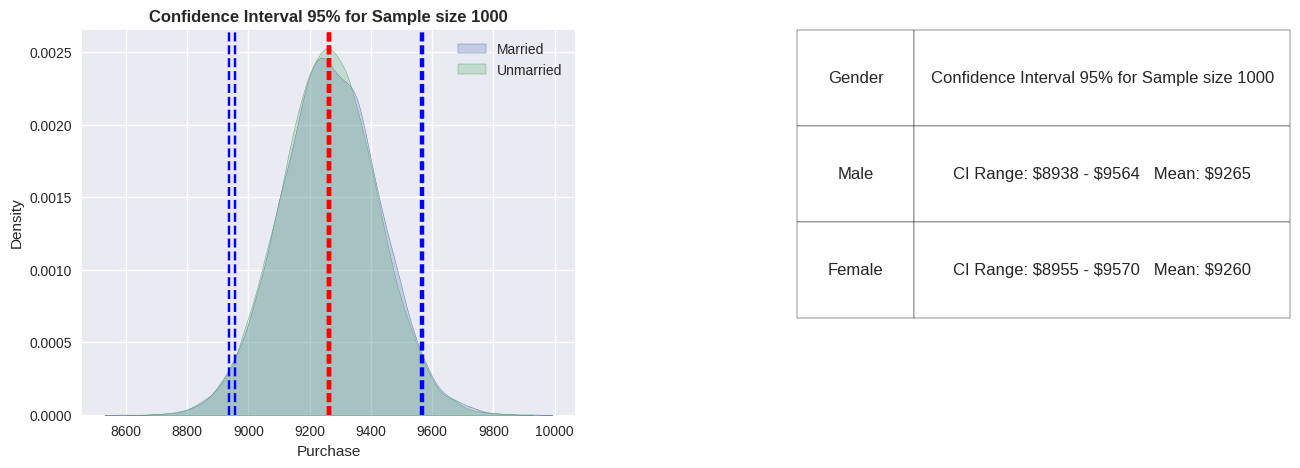

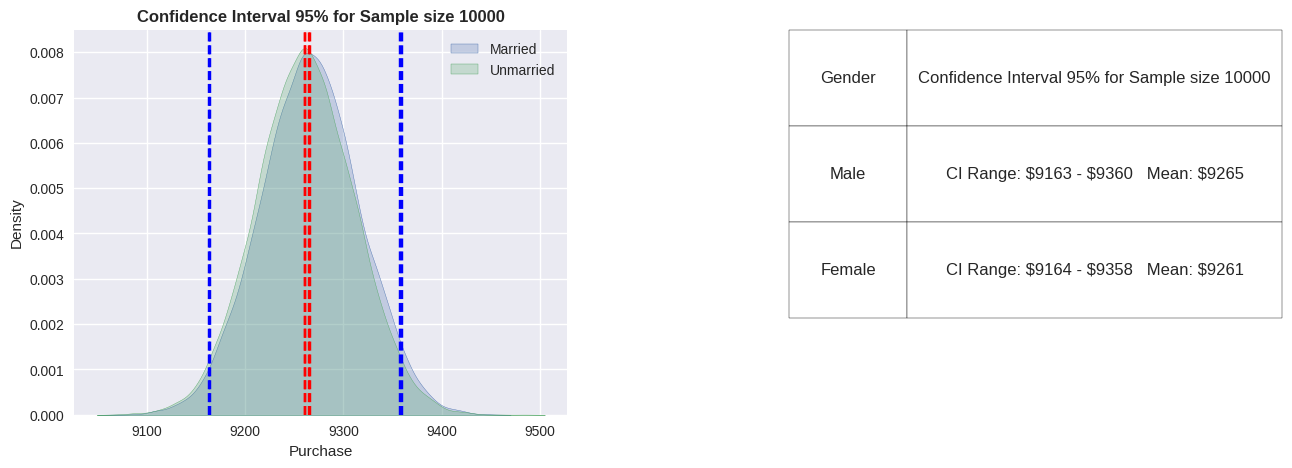

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=95,sample_size=i)

#### Confidence Interval for 99%

<Figure size 1500x4000 with 0 Axes>

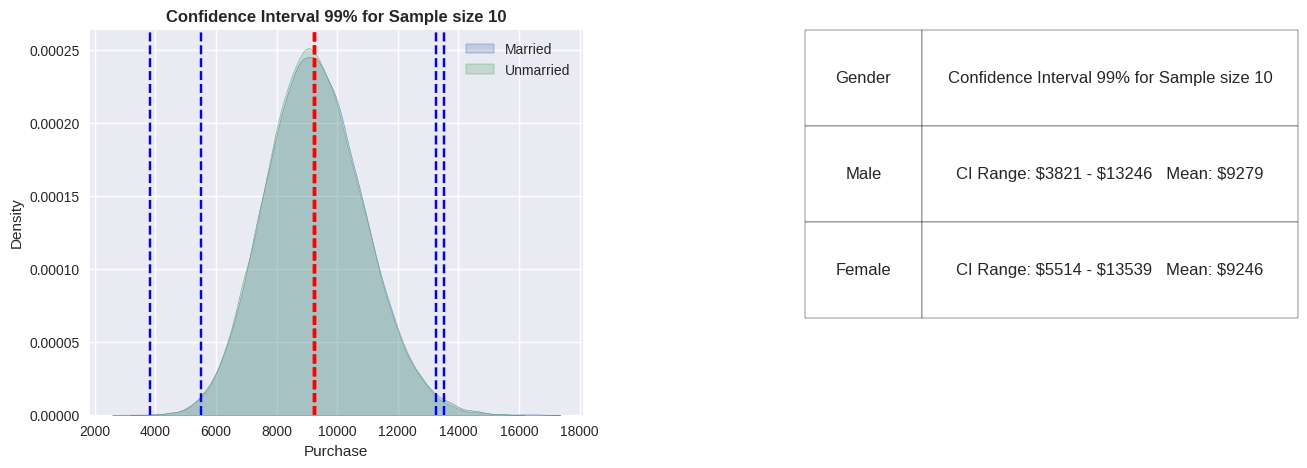

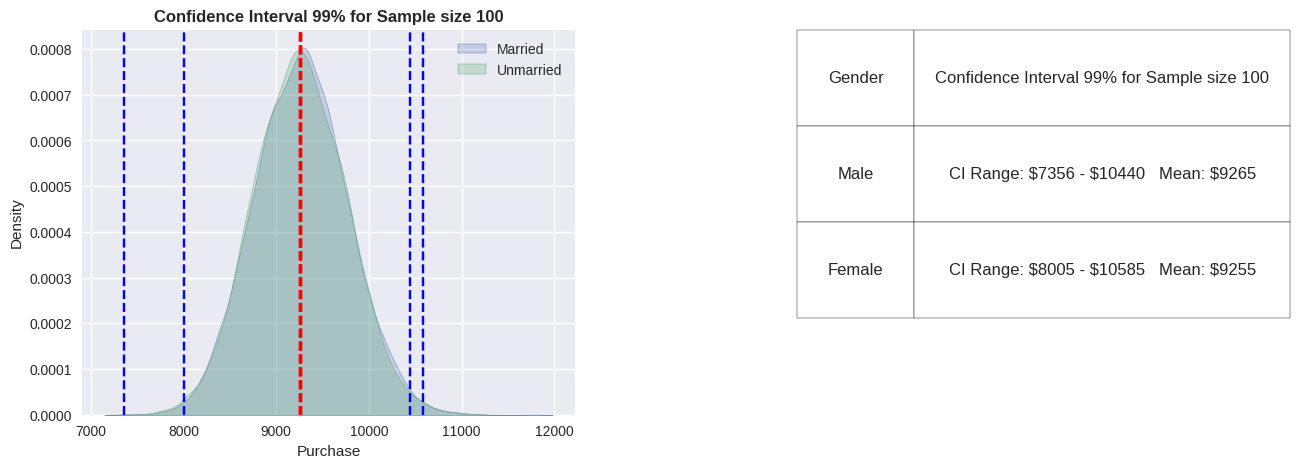

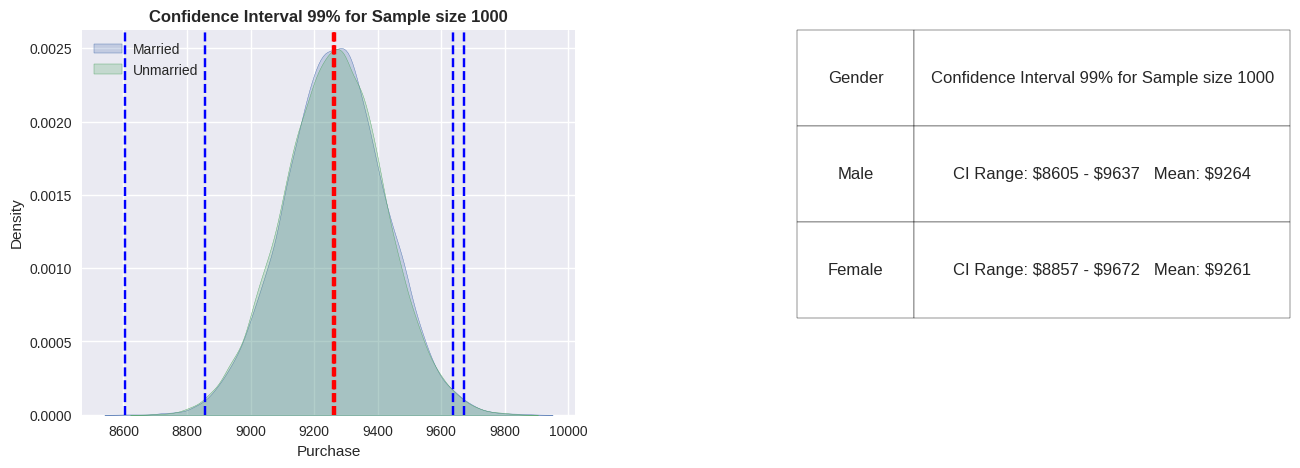

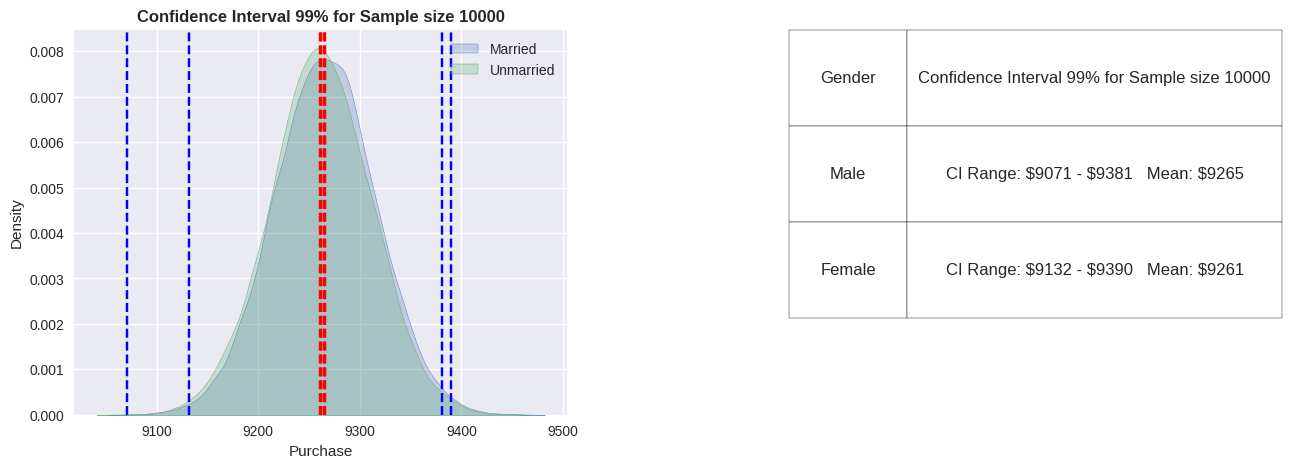

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=99,sample_size=i)

**Insights**

1. Sample Size

 - The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals

 - From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.
3. Population Average

 - We are 95% confident that the true population average for married customers falls between $9,217 and $9,305, and for unmarried customers, it falls between $9,222 and $9,311.
4. Both the customers spend equal

 - The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.

**Recommendation** : How can Walmart leverage this conclusion to make changes or
improvements?
**

1. Marketing Resources

 - Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

## Which Age Group spending more money per transaction? (Youngers or Adults)

In [ ]:
total2 = data.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()
total2['sum_in_billions'] = round(total2['sum'] / 10**9,2)
total2['%sum'] = round(total2['sum']/total2['sum'].sum(),3)
total2['per_purchase'] = round(total2['sum']/total2['count'])
total2

Age         sum   count  sum_in_billions   %sum  per_purchase
0   0-17   134913183   15102             0.13  0.026        8933.0
1  18-25   913848675   99660             0.91  0.179        9170.0
2  26-35  2031770578  219587             2.03  0.399        9253.0
3  36-45  1026569884  110013             1.03  0.201        9331.0
4  46-50   420843403   45701             0.42  0.083        9209.0
5  51-55   367099644   38501             0.37  0.072        9535.0
6    55+   200767375   21504             0.20  0.039        9336.0

### *Actual Data*

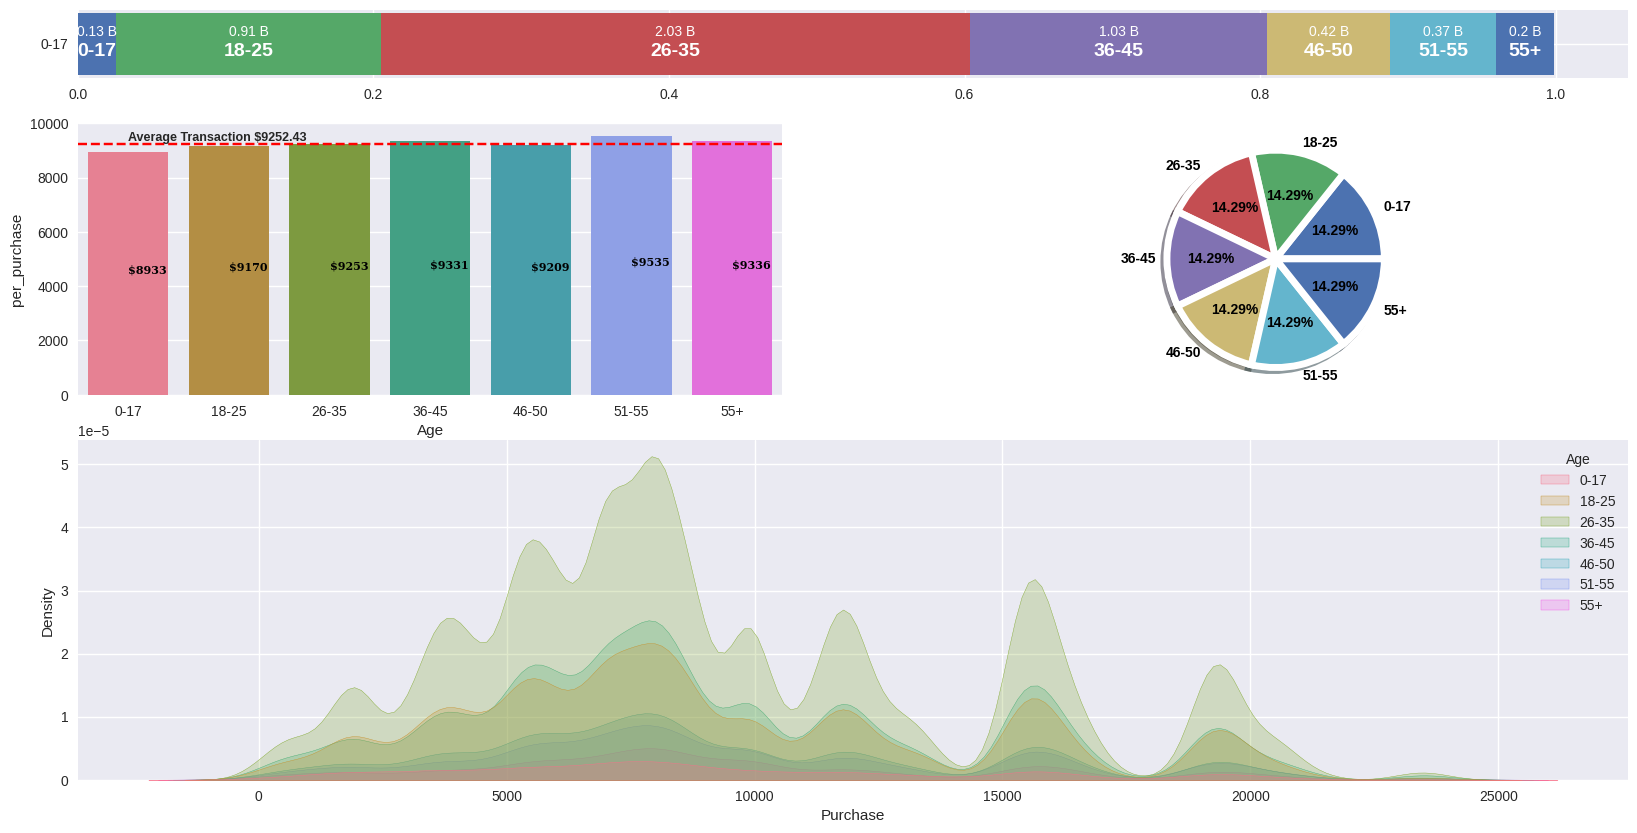

In [ ]:
fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(3,2,height_ratios=[0.1,0.4,0.5])
ax = fig.add_subplot(gs[0,:])
left=0
for i in total2.index:
  ax.barh(total2.loc[0,'Age'],width=total2.loc[i,'%sum'],left=left,label=total2.loc[i,'Age'])
  left += total2.loc[i,'%sum']
left=0
for i in total2.index:
  ax.text(total2.loc[i,'%sum']/2 + left,0.15,f"{total2.loc[i,'sum_in_billions']} B", va = 'center', ha='center',fontsize=10, color='white')
  ax.text(total2.loc[i,"%sum"]/2+left,-0.10,total2.loc[i,'Age'],{'fontsize':14,'color':'white','fontweight':'bold'},va='center',ha='center',)
  left += total2.loc[i,'%sum']

ax1=fig.add_subplot(gs[1,0])
ax1.axhline(total2['per_purchase'].mean(),color='red',linestyle='--')
ax1.text(0,total2['per_purchase'].mean()+100,f"Average Transaction ${round(total2['per_purchase'].mean(),2)}",{'fontsize':9,'fontweight':'bold'})
sns.barplot(data=total2,x='Age',y='per_purchase',ax=ax1,width=0.8,hue='Age')
for i in total2.index:
  ax1.text(total2.loc[i,'Age'],total2.loc[i,'per_purchase']/2,f"${total2.loc[i,'per_purchase']:.0f}", {'font':'serif','size' : 8,'color':'black','weight':'bold' })

ax2 = fig.add_subplot(gs[1,1])
plt.pie(total2['Age'].value_counts(),labels = total2['Age'].value_counts().index,autopct='%1.2f%%',shadow=True,wedgeprops={'linewidth':5,'edgecolor':'white',"antialiased": True} ,textprops={'fontsize':10,'weight':'bold',"color":'black'})

ax3 = fig.add_subplot(gs[2,:])
sns.kdeplot(data=data,x='Purchase',hue='Age',ax=ax3,fill=True)
plt.show()


**Insights**

1. Total Sales Comparison
 - Age group between 26 - 45 accounts to almost 60% of the total sales suggesting that Walmart's Black Friday sales are most popular among these age groups.
 - The age group 0-17 has the lowest sales percentage (2.6%), which is expected as they may not have as much purchasing power. Understanding their preferences and providing special offers could be beneficial, especially considering the potential for building customer loyalty as they age.

2. Average Transaction Value

 - While there is not a significant difference in per purchase spending among the age groups, the 51-55 age group has a relatively low sales percentage (7.2%)but they have the highest per purchase spending at 9535. Walmart could consider strategies to attract and retain this high-spending demographic.
3. Distribution of Purchase Amount

 - As seen above, the purchase amount for all age groups is not normally distributed.

### *Sample Data*

In [ ]:
data['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [ ]:
def sampleCiClt(ci,sample_size):
  sample = 20000
  data_1 = data[data['Age']=='0-17']['Purchase']
  data_2 = data[data['Age']=='18-25']['Purchase']
  data_3 = data[data['Age']=='26-35']['Purchase']
  data_4 = data[data['Age']=='36-45']['Purchase']
  data_5 = data[data['Age']=='46-50']['Purchase']
  data_6 = data[data['Age']=='51-55']['Purchase']
  data_7 = data[data['Age']=='55+']['Purchase']
  d1_sample,d2_sample,d3_sample,d4_sample,d5_sample,d6_sample,d7_sample = [],[],[],[],[],[],[]

  #applying CLT
  for i in range(sample):
      d1_sample.append(np.mean(np.random.choice(data_1,size=sample_size)))
      d2_sample.append(np.mean(np.random.choice(data_2,size=sample_size)))
      d3_sample.append(np.mean(np.random.choice(data_3,size=sample_size)))
      d4_sample.append(np.mean(np.random.choice(data_4,size=sample_size)))
      d5_sample.append(np.mean(np.random.choice(data_5,size=sample_size)))
      d6_sample.append(np.mean(np.random.choice(data_6,size=sample_size)))
      d7_sample.append(np.mean(np.random.choice(data_7,size=sample_size)))
  data1_sample = pd.DataFrame({"Purchase":data_1})
  data2_sample = pd.DataFrame({"Purchase":data_2})
  data3_sample = pd.DataFrame({"Purchase":data_3})
  data4_sample = pd.DataFrame({"Purchase":data_4})
  data5_sample = pd.DataFrame({"Purchase":data_5})
  data6_sample = pd.DataFrame({"Purchase":data_6})
  data7_sample = pd.DataFrame({"Purchase":data_7})

  fig= plt.figure(figsize=(14,5))
  gs = fig.add_gridspec(1,2)
  ax= fig.add_subplot(gs[0,0])
  ax.set_title(f"Confidence Interval {ci}% for Sample size {sample_size}",{'weight':'bold'})
  sns.kdeplot(data=data1_sample,x='Purchase',ax=ax,fill=True,label="0-17")
  sns.kdeplot(data=data2_sample,x='Purchase',ax=ax,fill=True,label="18-25")
  sns.kdeplot(data=data3_sample,x='Purchase',ax=ax,fill=True,label="26-35")
  sns.kdeplot(data=data4_sample,x='Purchase',ax=ax,fill=True,label="36-45")
  sns.kdeplot(data=data5_sample,x='Purchase',ax=ax,fill=True,label="46-50")
  sns.kdeplot(data=data6_sample,x='Purchase',ax=ax,fill=True,label="51-55")
  sns.kdeplot(data=data7_sample,x='Purchase',ax=ax,fill=True,label="55+")
  plt.legend()

  mean_d1 = int(data1_sample['Purchase'].mean())
  mean_d2 = int(data2_sample['Purchase'].mean())
  mean_d3 = int(data3_sample['Purchase'].mean())
  mean_d4 = int(data4_sample['Purchase'].mean())
  mean_d5 = int(data5_sample['Purchase'].mean())
  mean_d6 = int(data6_sample['Purchase'].mean())
  mean_d7 = int(data7_sample['Purchase'].mean())

  left_d1,right_d1 = np.percentile(data1_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_d2,right_d2 = np.percentile(data2_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_d3,right_d3 = np.percentile(data3_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_d4,right_d4 = np.percentile(data4_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_d5,right_d5 = np.percentile(data5_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_d6,right_d6 = np.percentile(data6_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])
  left_d7,right_d7 = np.percentile(data7_sample['Purchase'],[int((100-ci)/2),int((100+ci)/2)])

  line_data = [[int(left_d1),mean_d1,int(right_d1)],[int(left_d2),mean_d2,int(right_d2)],[int(left_d3),mean_d3,int(right_d3)],[int(left_d4),mean_d4,int(right_d4)],[int(left_d5),mean_d5,int(right_d5)],[int(left_d6),mean_d6,int(right_d6)],[int(left_d7),mean_d7,int(right_d7)]]
  data_d1 = ['0-17',f'CI Range: ${int(left_d1)} - ${int(right_d1)}   Mean: ${mean_d1}']
  data_d2 = ['18-25',f'CI Range: ${int(left_d2)} - ${int(right_d2)}   Mean: ${mean_d2}']
  data_d3 = ['26-35',f'CI Range: ${int(left_d3)} - ${int(right_d3)}   Mean: ${mean_d3}']
  data_d4 = ['36-45',f'CI Range: ${int(left_d4)} - ${int(right_d4)}   Mean: ${mean_d4}']
  data_d5 = ['46-50',f'CI Range: ${int(left_d5)} - ${int(right_d5)}   Mean: ${mean_d5}']
  data_d6 = ['51-55',f'CI Range: ${int(left_d6)} - ${int(right_d6)}   Mean: ${mean_d6}']
  data_d7 = ['55+',f'CI Range: ${int(left_d7)} - ${int(right_d7)}   Mean: ${mean_d7}']

  for i in range(7):
    plt.axvline(line_data[i][0],color='blue',linestyle='--')
    plt.axvline(line_data[i][1],color='red',linestyle='--')
    plt.axvline(line_data[i][2],color='blue',linestyle='--')

  ax1 = fig.add_subplot(gs[0,1])
  ax1.axis('off')
  table = ax1.table(cellText=[data_d1,data_d2,data_d3,data_d4,data_d5,data_d6,data_d7],loc='center',cellLoc='center',colLabels=["Age",f"Confidence Interval {ci}% for Sample size {sample_size}"],colWidths=[0.25,0.8],bbox=[0.25,0.25,1,0.75])
  table.auto_set_font_size(False)
  table.set_fontsize(12)
  plt.show()

#### Confidence Interval for 90%

<Figure size 1500x4000 with 0 Axes>

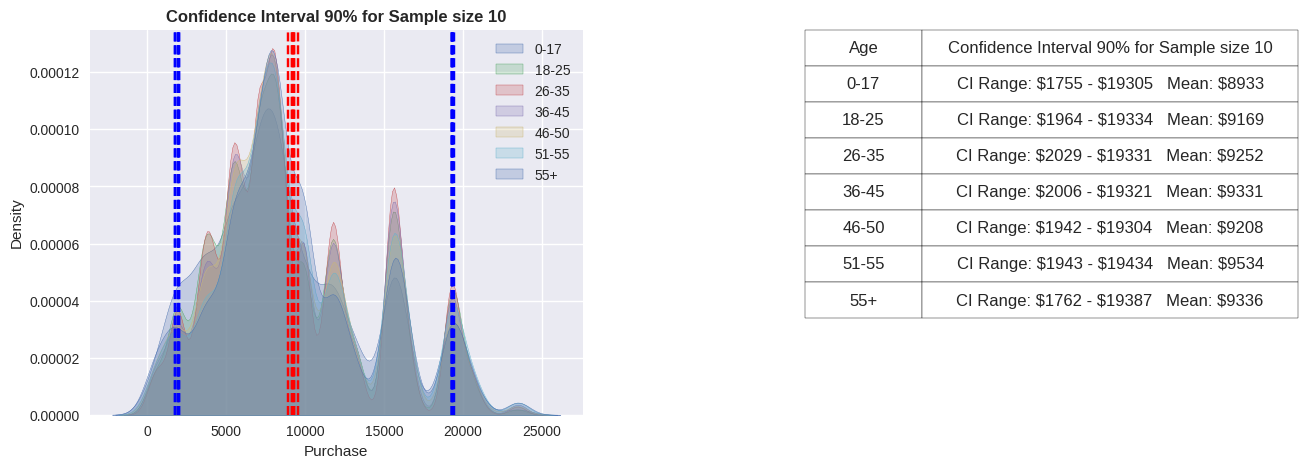

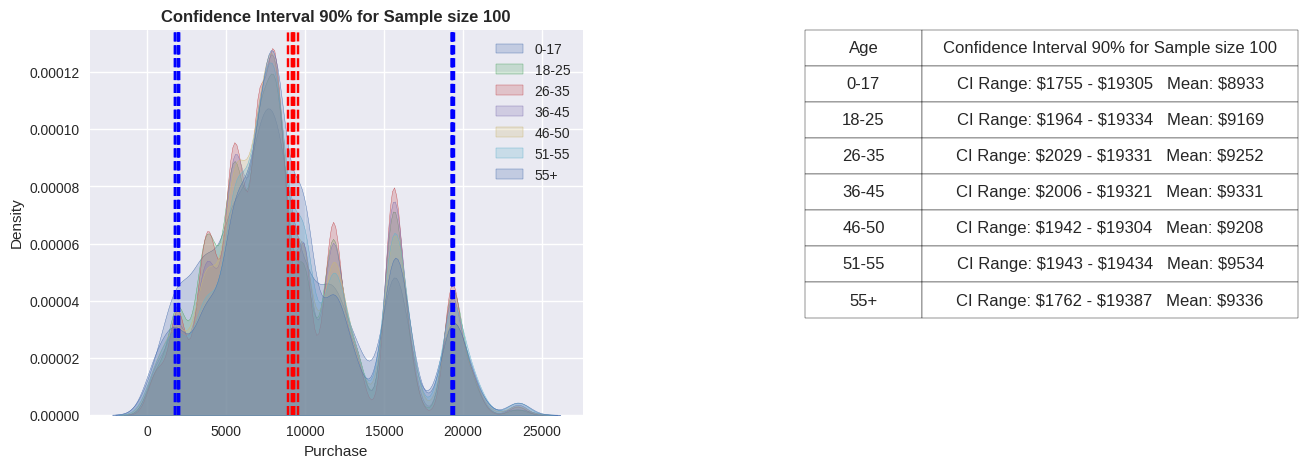

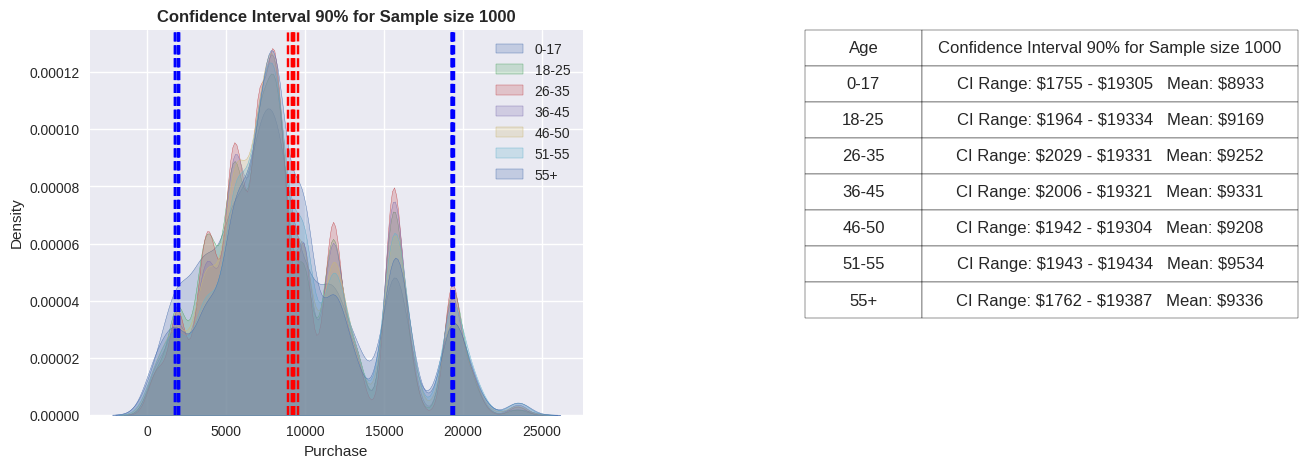

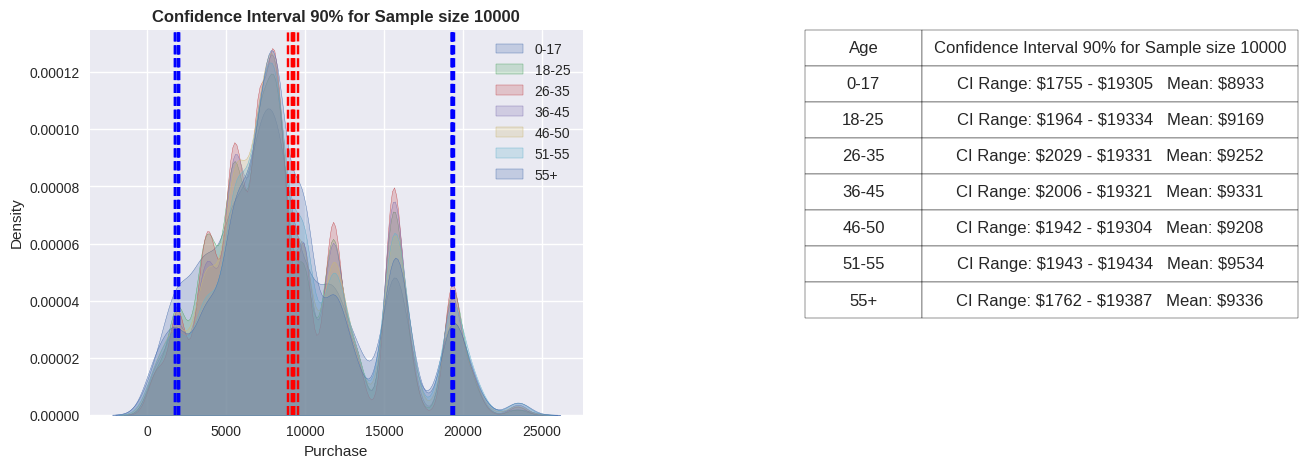

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=90,sample_size=i)

#### Confidence Interval for 95%

<Figure size 1500x4000 with 0 Axes>

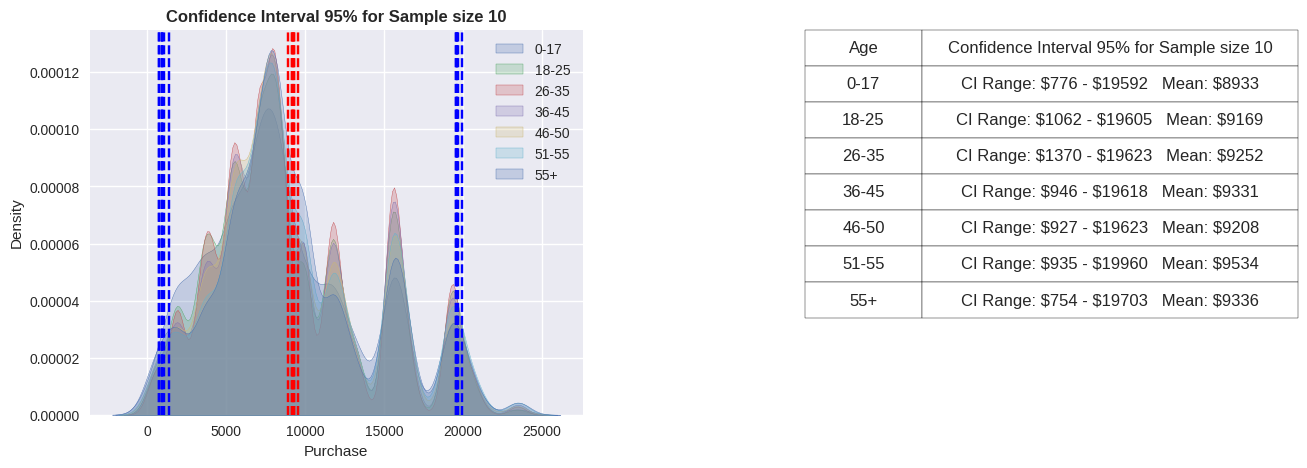

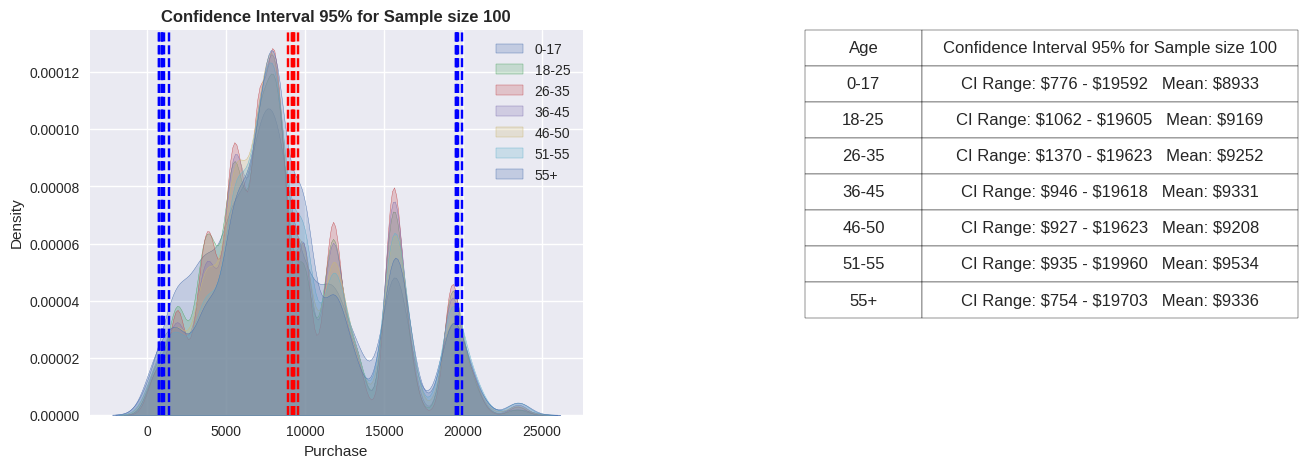

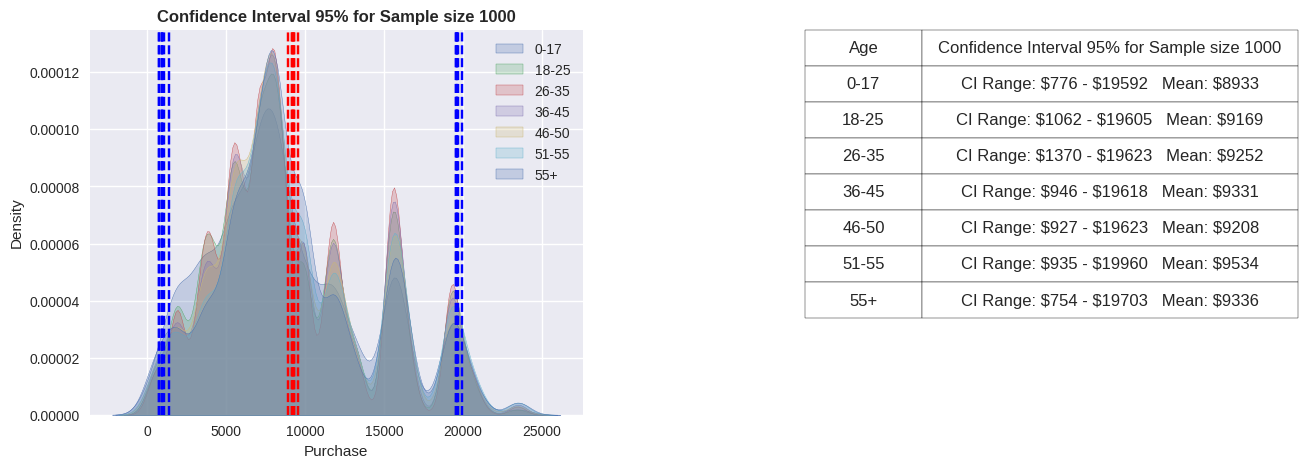

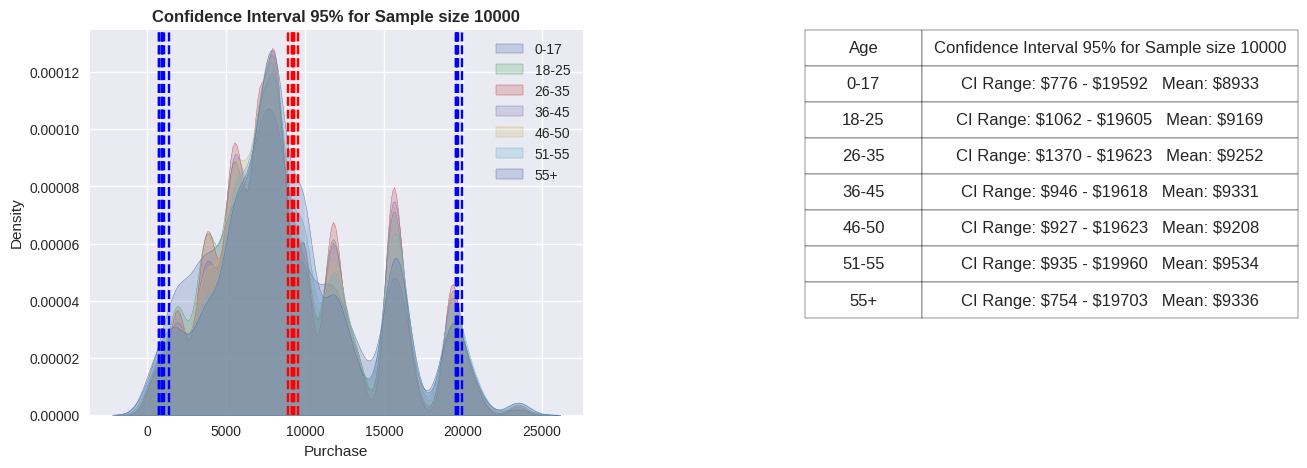

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=95,sample_size=i)

#### Confidence Interval for 99%

<Figure size 1500x4000 with 0 Axes>

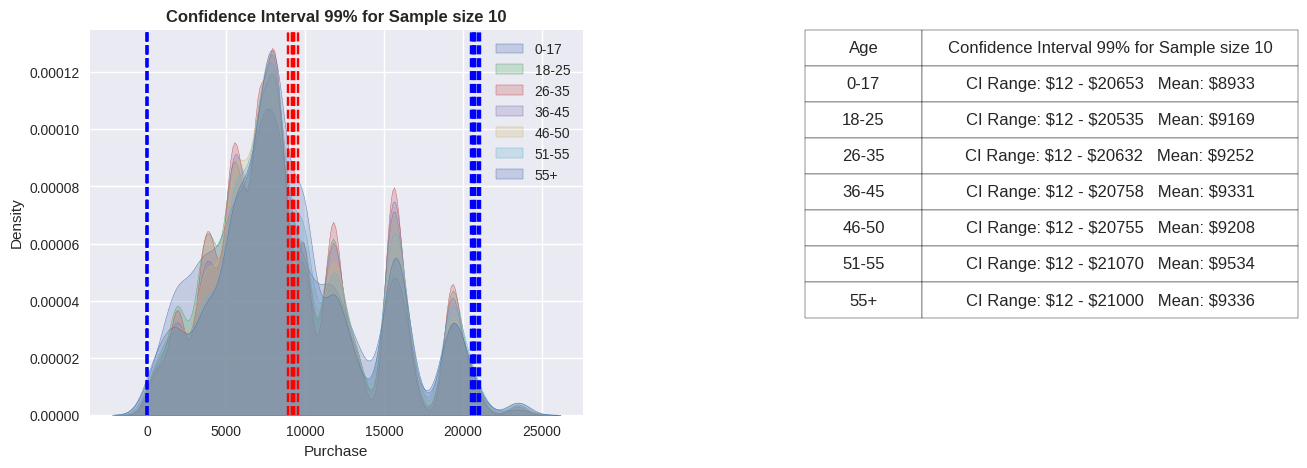

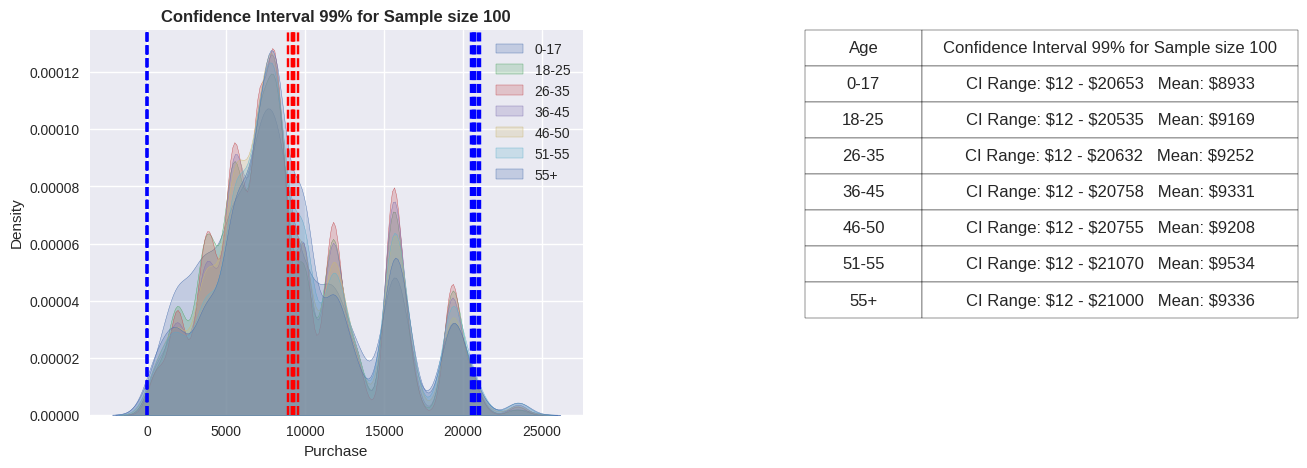

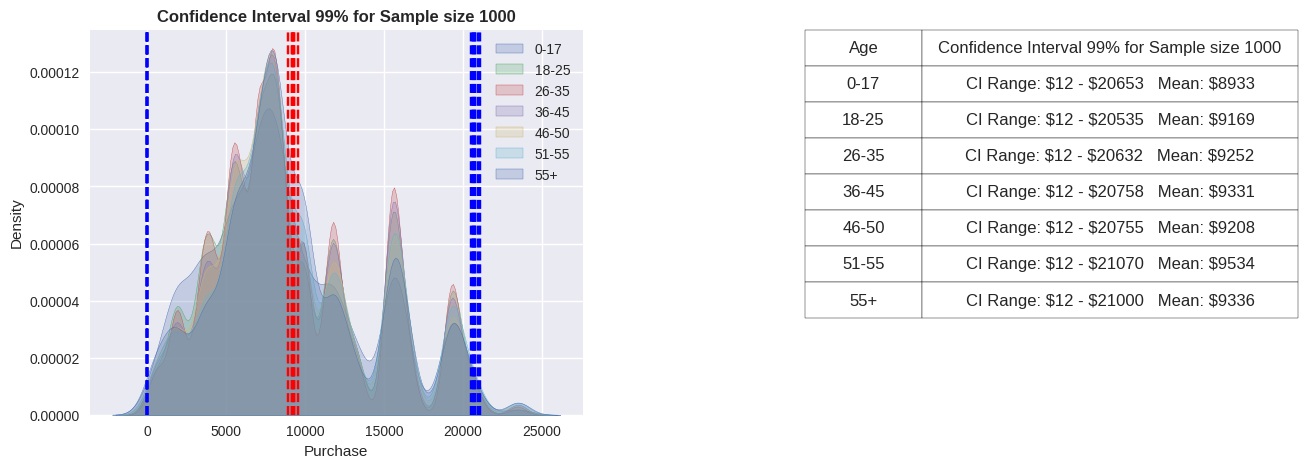

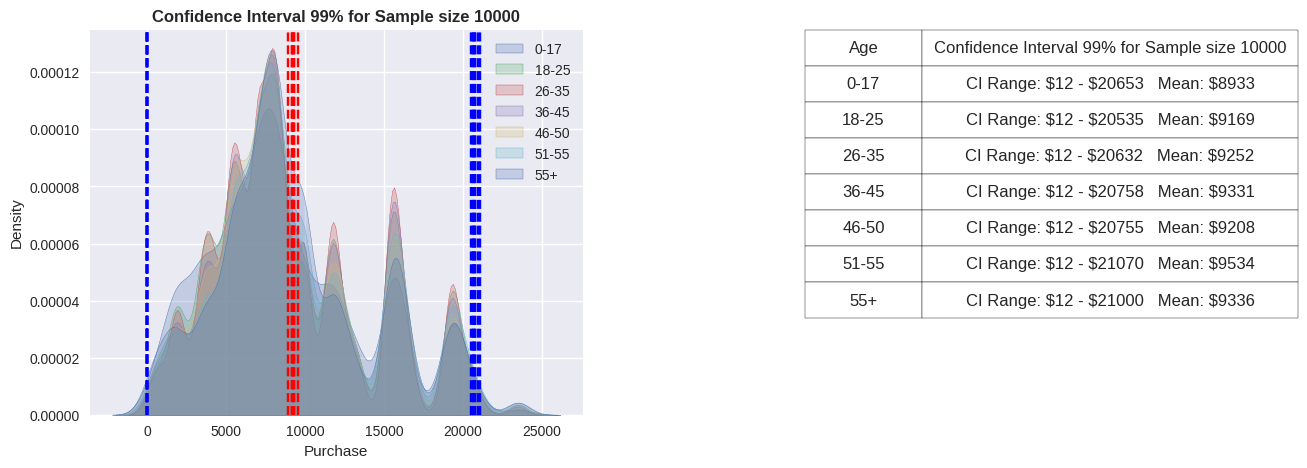

In [ ]:
sample_size = [10,100,1000,10000]
fig=plt.figure(figsize=(15,40))
for i in sample_size:
  sampleCiClt(ci=99,sample_size=i)

**Insights**
1. Sample Size

 - The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals and customer spending patterns

 - From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -
     - 0 - 17 - Customers in this age group have the lowest spending per transaction
     - 18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics
     - 36 - 45, 55+ - Customers in these age groups have overlapping confidence intervals indicating and similar spending patterns
     - 51 - 55 - Customers in this age group have the highest spending per transaction
3. Population Average

 - We are 95% confident that the true population average for following age groups falls between the below range -

     - 0 - 17 = $ 8,888 to 8,979
     - 18 - 25 = $ 9,125 to 9,213
     - 26 - 35 = $ 9,209 to 9,297
     - 36 - 45 = $ 9,288 to 9,376
     - 46 - 50 = $ 9,165 to 9,253
     - 51 - 55 = $ 9,490 to 9,579
     - 55+ = $ 9,292 to 9,381

**Recomendation: How can Walmart leverage this conclusion to make changes or improvements?**

1. Targeted Marketing

 - Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. Walmart can also tailor their product selection and marketing strategies to appeal to the preferences and needs of this age group
2. Customer Segmentation

 - Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
3. Premium Services

 - Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.

# **Recommendations**

1. Targeted Marketing Strategies
 - Male Shoppers:

    - Develop marketing campaigns focusing on male-dominated products.
    - Offer exclusive deals or bundles for electronics, sports equipment, and other popular male-oriented items.
 - Female Shoppers:

    - Enhance product offerings with competitive pricing for female-oriented products.
    - Create special promotions for women's clothing, beauty products, and household items.
2. Age-Specific Initiatives
 - 26-45 Age Group:

    - Curate product selections and promotions tailored to this demographic’s preferences.
    - Offer loyalty programs with benefits that appeal to this age group, such as family-oriented rewards or tech product discounts.
 - Younger Shoppers (0-17):

    - Introduce special youth discount days or back-to-school promotions.
    - Collaborate with brands that resonate with younger consumers to create exclusive product lines.
 - 51-55 Age Group:

    - Provide premium services such as personalized shopping assistants or exclusive shopping hours.
    - Develop loyalty programs with high-value rewards and personalized offers.
3. Enhancing Customer Experience
 - Segmentation Opportunities:

    - Segment marketing efforts to cater to distinct spending behaviors.
    - Use data analytics to personalize marketing messages and product recommendations.
 - Customer Service:

    - Improve in-store customer service with knowledgeable staff to assist different demographic groups.
    - Implement feedback mechanisms to continually improve the shopping experience.
4. Innovative Pricing and Promotion Tactics
 - Pricing Strategies:

    - Implement dynamic pricing strategies that offer competitive pricing on high-demand items.
    - Offer tiered discounts that encourage higher spending thresholds.
 - Promotional Campaigns:

    - Run flash sales or limited-time offers to create urgency and drive purchases.
    - Use targeted digital advertising to reach specific customer segments with tailored offers.
5. Post-Purchase Engagement
 - Follow-Up Strategies:

    - Send personalized thank-you emails with recommendations for related products.
    - Offer post-purchase surveys with incentives for feedback.
 - Loyalty Programs:

    - Develop a robust loyalty program that rewards frequent shoppers with points, discounts, or exclusive access.
    - Create a tiered loyalty system with escalating rewards to encourage repeat business.

6. Data-Driven Insights and Adjustments
 - Regular Analysis:

    - Continuously analyze sales data to identify emerging trends and adjust strategies accordingly.
    - Conduct regular customer surveys to gain insights into changing preferences.
 - A/B Testing:

    - Use A/B testing for different marketing campaigns to determine the most effective strategies.
    - Experiment with various promotional offers and measure their impact on sales.
7. Community and Social Responsibility
 - Community Engagement:

    - Host community events or sponsor local activities to build brand loyalty.
    - Partner with local organizations for joint promotions and initiatives.
 - Sustainability Initiatives:

    - Promote sustainable products and practices to appeal to environmentally conscious consumers.
    - Implement recycling programs or offer incentives for eco-friendly purchases.

8. Post-Black Friday Engagement

 - After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.

 9. Product Choices
 - Company can look at which types of products are popular with men and women and make sure those products are easy to find and buy in the store.

10. Different Groups
 - Company can also look at other factors, like how old customers are, where they live, and if they’re married or not. This can help to figure out how to make shopping better for different types of customers.

11. Consistent Shopping (Customer Rating)
 - While Company is making shopping better for different groups, it’s important to make sure
that everyone has a good shopping experience, no matter who they are.

                                                          -- Thank You --